In [29]:
##importing library

# to handle data in form of rows and columns 
import pandas as pd   
import numpy as np

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

 
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

# to standardise the data
from scipy.stats import zscore

# to determine the number of clusters
from sklearn.cluster import KMeans

#for predicting accuracy and other attributes

from sklearn import metrics

#for 3-D plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import r2_score

loading csv data into pandas dataframe

In [30]:
cardf = pd.read_csv('cars-dataset.csv')

Printing first 50 records of the  dataset to understand the data

In [31]:
cardf.shape
#consist of 398 rows and  8 columns

(398, 8)

In [32]:
cardf.head(50)

car name  cyl   disp   hp    wt   acc  yr   mpg
0      chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1              buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2             plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3                  amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                    ford torino    8  302.0  140  3449  10.5  70  17.0
5               ford galaxie 500    8  429.0  198  4341  10.0  70  15.0
6               chevrolet impala    8  454.0  220  4354   9.0  70  14.0
7              plymouth fury iii    8  440.0  215  4312   8.5  70  14.0
8               pontiac catalina    8  455.0  225  4425  10.0  70  14.0
9             amc ambassador dpl    8  390.0  190  3850   8.5  70  15.0
10           dodge challenger se    8  383.0  170  3563  10.0  70  15.0
11            plymouth 'cuda 340    8  340.0  160  3609   8.0  70  14.0
12         chevrolet monte carlo    8  400.0  150  3761   9.5  70  15.0
13       buick estate wagon (sw)    8  455.0  225  3086  10.0  70  14.0
14         toyota corona mark ii    4  113.0   95  2372  15.0  70  24.0
15               plymouth duster    6  198.0   95  2833  15.5  70  22.0
16                    amc hornet    6  199.0   97  2774  15.5  70  18.0
17                 ford maverick    6  200.0   85  2587  16.0  70  21.0
18                  datsun pl510    4   97.0   88  2130  14.5  70  27.0
19  volkswagen 1131 deluxe sedan    4   97.0   46  1835  20.5  70  26.0
20                   peugeot 504    4  110.0   87  2672  17.5  70  25.0
21                   audi 100 ls    4  107.0   90  2430  14.5  70  24.0
22                      saab 99e    4  104.0   95  2375  17.5  70  25.0
23                      bmw 2002    4  121.0  113  2234  12.5  70  26.0
24                   amc gremlin    6  199.0   90  2648  15.0  70  21.0
25                     ford f250    8  360.0  215  4615  14.0  70  10.0
26                     chevy c20    8  307.0  200  4376  15.0  70  10.0
27                    dodge d200    8  318.0  210  4382  13.5  70  11.0
28                      hi 1200d    8  304.0  193  4732  18.5  70   9.0
29                  datsun pl510    4   97.0   88  2130  14.5  71  27.0
30           chevrolet vega 2300    4  140.0   90  2264  15.5  71  28.0
31                 toyota corona    4  113.0   95  2228  14.0  71  25.0
32                    ford pinto    4   98.0    ?  2046  19.0  71  25.0
33                   amc gremlin    6  232.0  100  2634  13.0  71  19.0
34     plymouth satellite custom    6  225.0  105  3439  15.5  71  16.0
35     chevrolet chevelle malibu    6  250.0  100  3329  15.5  71  17.0
36               ford torino 500    6  250.0   88  3302  15.5  71  19.0
37                   amc matador    6  232.0  100  3288  15.5  71  18.0
38              chevrolet impala    8  350.0  165  4209  12.0  71  14.0
39     pontiac catalina brougham    8  400.0  175  4464  11.5  71  14.0
40              ford galaxie 500    8  351.0  153  4154  13.5  71  14.0
41             plymouth fury iii    8  318.0  150  4096  13.0  71  14.0
42             dodge monaco (sw)    8  383.0  180  4955  11.5  71  12.0
43      ford country squire (sw)    8  400.0  170  4746  12.0  71  13.0
44           pontiac safari (sw)    8  400.0  175  5140  12.0  71  13.0
45    amc hornet sportabout (sw)    6  258.0  110  2962  13.5  71  18.0
46           chevrolet vega (sw)    4  140.0   72  2408  19.0  71  22.0
47              pontiac firebird    6  250.0  100  3282  15.0  71  19.0
48                  ford mustang    6  250.0   88  3139  14.5  71  18.0
49            mercury capri 2000    4  122.0   86  2220  14.0  71  23.0

In [33]:
cardf.shape
#car dataset has 398 rows and 8columns

(398, 8)

Checking for null values

In [34]:
cardf.isnull().sum()
#From the result it seems that there are no null values

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [35]:
##checking cloumn details
cardf.describe().T
#In every column mean is greater than median which means that variables are normally distributed and skewed towards right
#Though hp column is numeric it is missin in the describe . So something wrong with the data/


count         mean         std     min       25%     50%       75%  \
cyl   398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp  398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt    398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc   398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr    398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
mpg   398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   

         max  
cyl      8.0  
disp   455.0  
wt    5140.0  
acc     24.8  
yr      82.0  
mpg     46.6

In [36]:
#checking the datatypes and not null information of the datasets
cardf.info()
# car name is object and other variables are int and float. there is smething wrong with horse power though it is numeric it shows as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


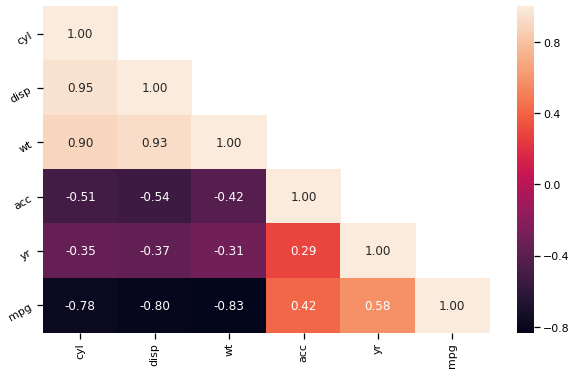

In [37]:
##checking correlation between varaiables . A
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,6))
# create a mask so we only see the correlation values once
mask = np.zeros_like(cardf.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(cardf.corr(),mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


In this mpg column is target variable.Here car dataset is considered for unsupervised learning, hence we are not finding the relation between independent and dependent variables. Unsupervised learning is used for unlabelled dataset.

In [38]:
##checking the unique values for cylinder column
cardf['cyl'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [39]:
##checking the unique values for displacement column
cardf['disp'].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

In [40]:
##checking the unique values for weight column
cardf['wt'].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

In [41]:
#chekcing unique values for HP coumn
cardf['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Horse power has missing values ? . these values should be removed

In [42]:
#checking uniqu values for acceleration
cardf['acc'].unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [43]:
#checking unique values for year
cardf['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [44]:
#checking unique values for mpg
cardf['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [45]:
#Replace them with nan and remove the records from the data frame that have "nan"

missing_value=['?']
cardf=pd.read_csv('cars-dataset.csv',na_values = missing_value)
cardf.isnull().sum()


car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [46]:

cardf.isnull().sum()
 #There are 6 missing values in Horse power column which is found by analysing the csv file and also this column is missing from describe

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

There are 6 rows in HP attributes whoes values are not known

In [47]:
#Removing the missing values
cardf.dropna(inplace = True, axis=0)


In [48]:
#checking for null after removing null
cardf.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [49]:
cardf['hp'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


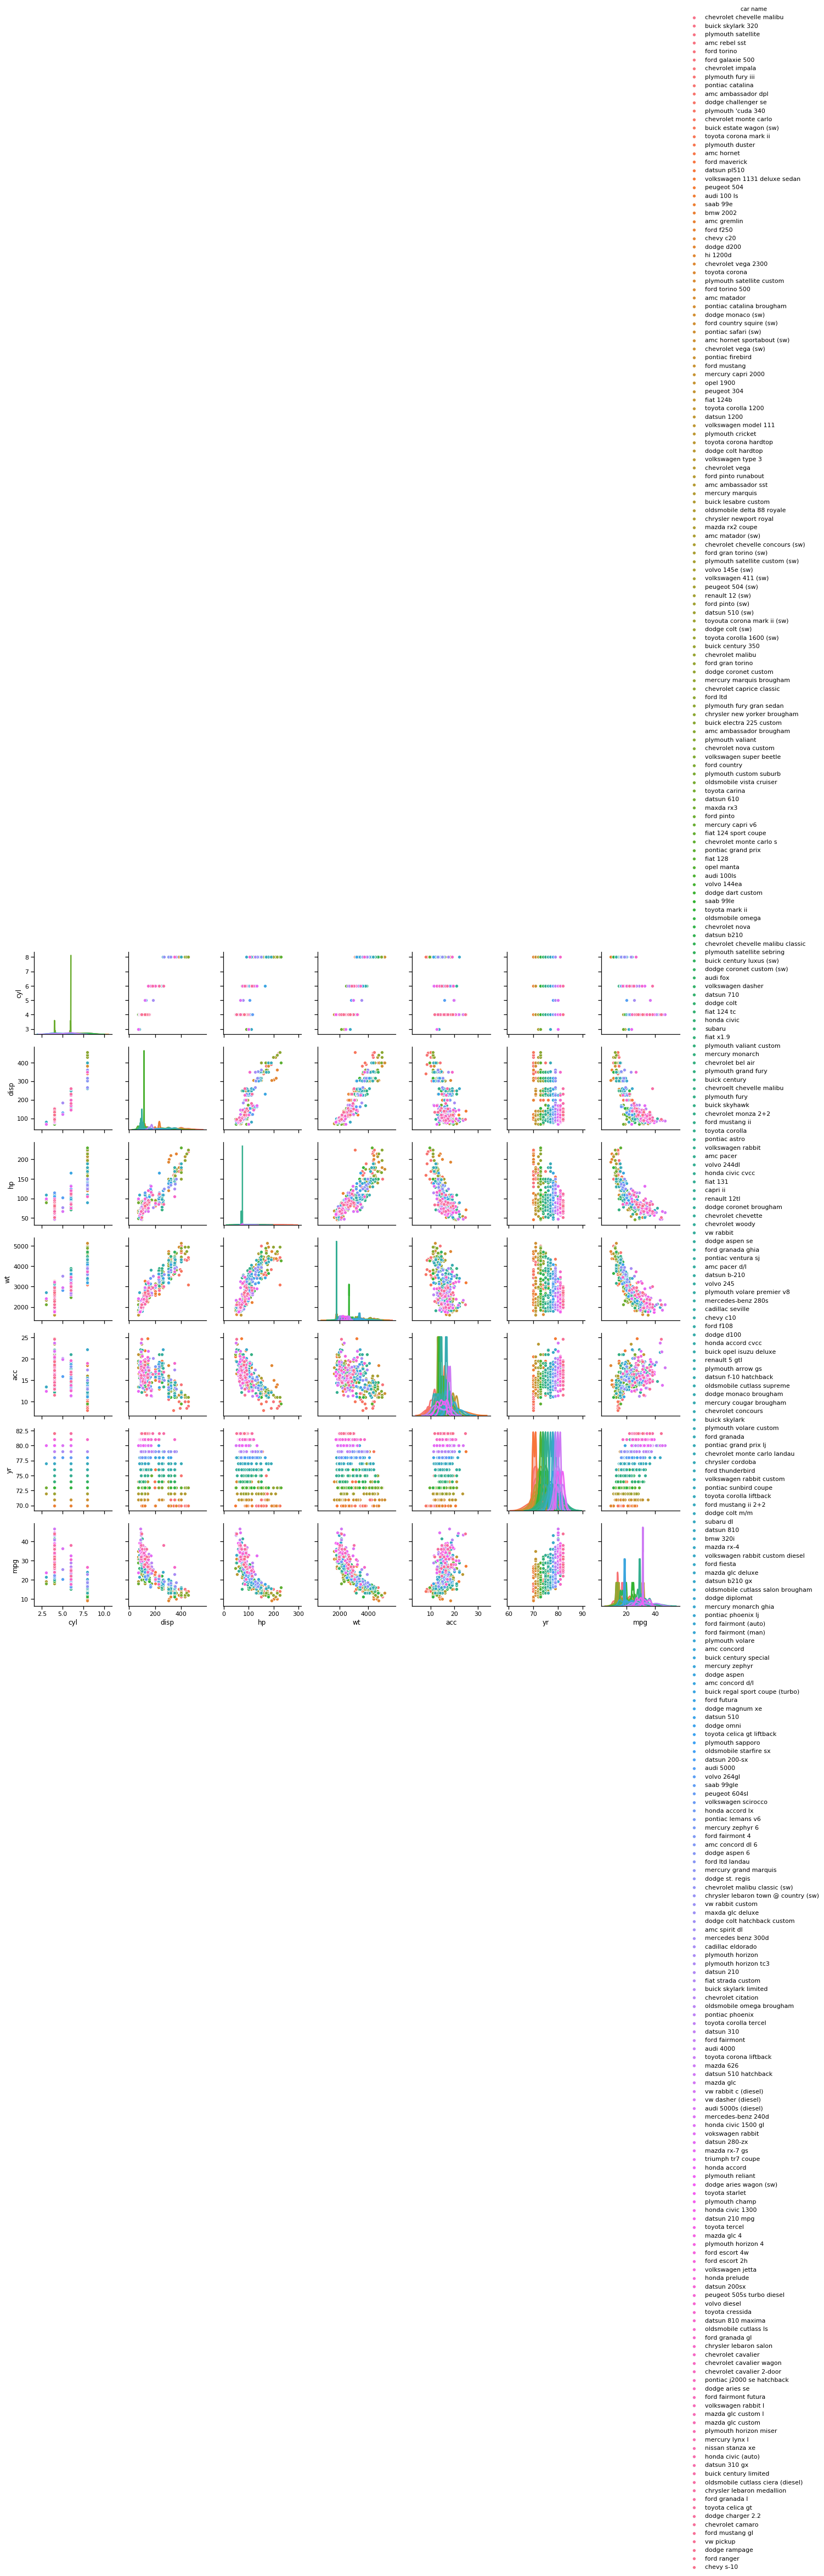

In [28]:
sns.pairplot(cardf, hue = 'car name')

Though non numeric column is used in pairplot to differentiate gaussian, in our case car name is not best feature in identifying the cluster. So using pairplot wihtout hue attirbute to differentiate gaussian

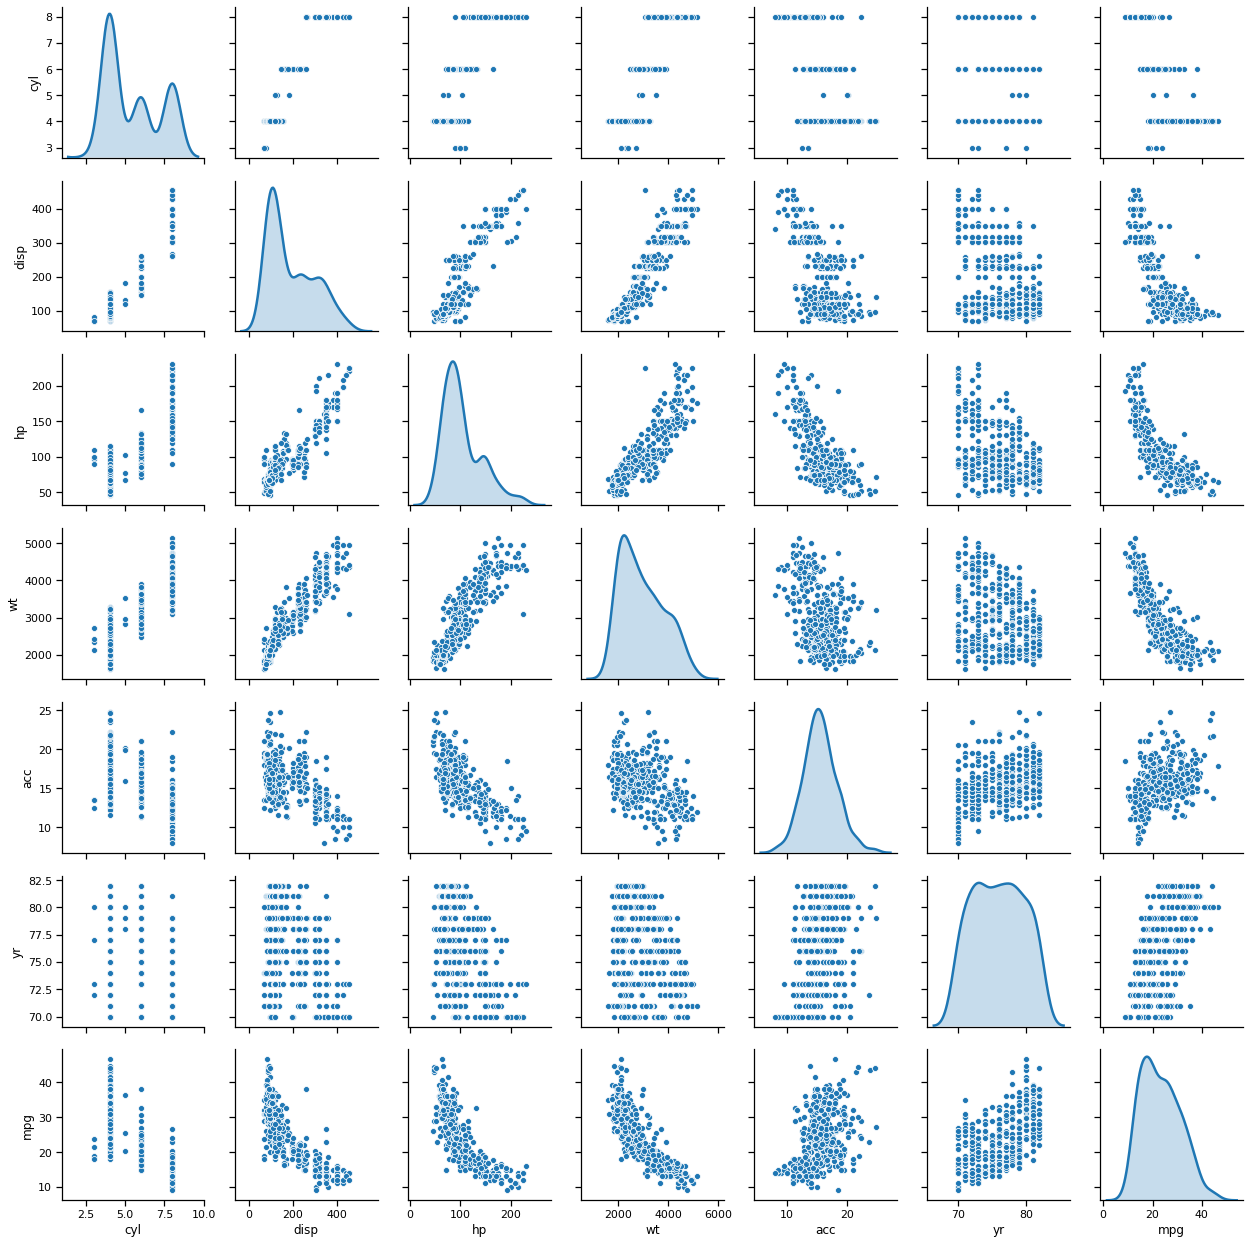

In [27]:
##pairplot to find the number of clusters
sns.pairplot(cardf, diag_kind='kde')

Only accelaration column is normally distributed
The data distribution across various dimensions do not look normal.
It is observed that relation between 'mpg' and other attributes are not linear.

We could find in the diagonal there are 3 gaussians in the dataset. There could be minimum 3 clusters in the data set. For the columns year ,weight , acceleration the clusters are overlapping and hence it is not clearly visible to identify the third cluster

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


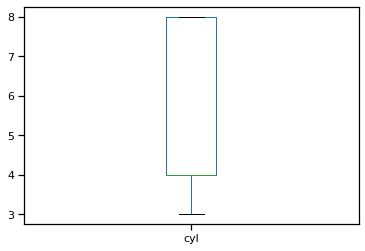

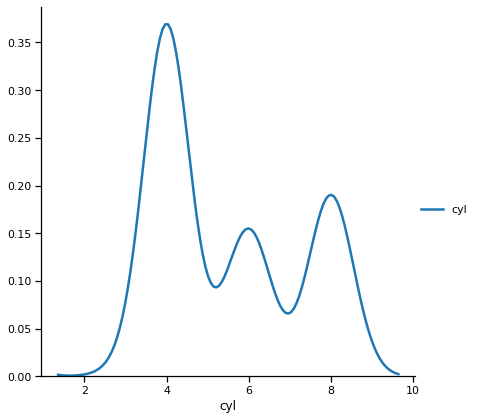

In [23]:
cardf['cyl'].plot(kind='box')
sns.FacetGrid(cardf, size=6).map(sns.kdeplot, "cyl").add_legend()

There are 3 overlapping curve in cylinder variable and the variance is high 

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


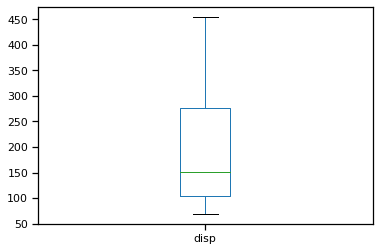

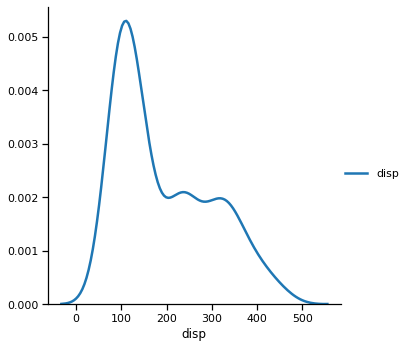

In [24]:
cardf['disp'].plot(kind='box')
sns.FacetGrid(cardf,size=5).map(sns.kdeplot, "disp").add_legend()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


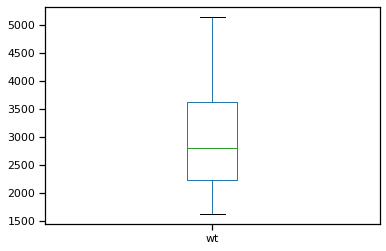

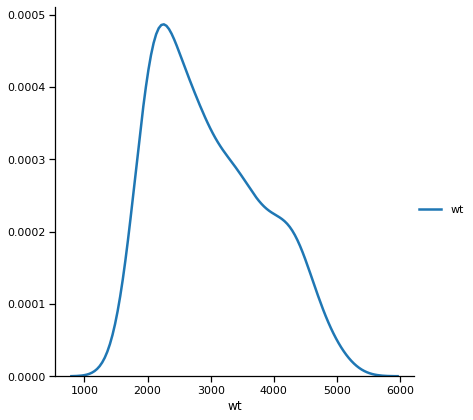

In [25]:
cardf['wt'].plot(kind='box')
sns.FacetGrid(cardf, size=6).map(sns.kdeplot, "wt").add_legend()

Could observe slight overlapping curve of wt column and there are no outiers

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


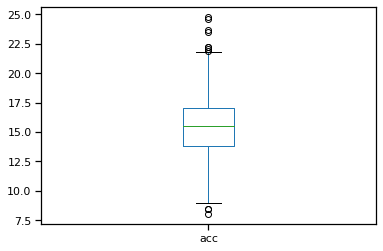

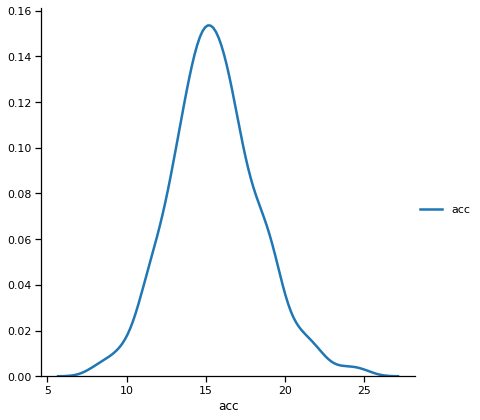

In [26]:
cardf['acc'].plot(kind='box')
sns.FacetGrid(cardf, size=6).map(sns.kdeplot, "acc").add_legend()

Acceleration is normally distributed curve with outliers and is skewed towards right and left 

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


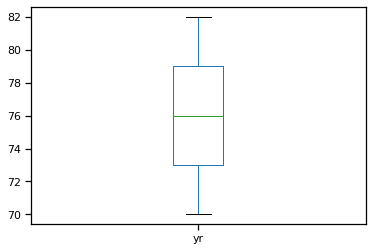

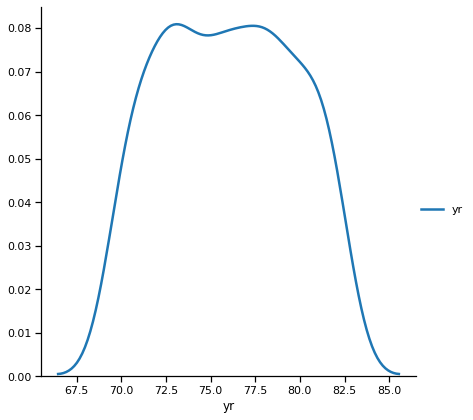

In [27]:
cardf['yr'].plot(kind='box')
sns.FacetGrid(cardf, size=6).map(sns.kdeplot, "yr").add_legend()

Year attribute has two overlaps and there are no outliers

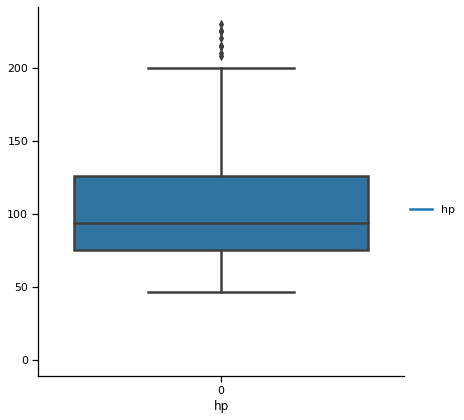

In [28]:
#
sns.FacetGrid(cardf, size=6).map(sns.kdeplot, "hp").add_legend()
sns.boxplot(data=cardf['hp'])

We could observe three overlapping curves and outiers in horse power column

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


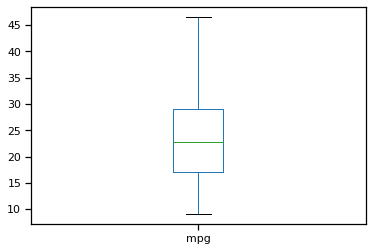

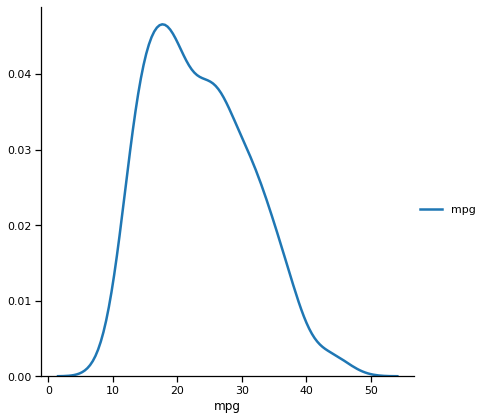

In [29]:
cardf['mpg'].plot(kind='box')
sns.FacetGrid(cardf , size=6).map(sns.kdeplot, "mpg").add_legend()

From the disrtibution of mpg column it is clear that there are two overlapping curves and there are no outliers of this column

In Clustering problem there are no dependent and independent variables. Our aim is to find the number of clusters and label them. 

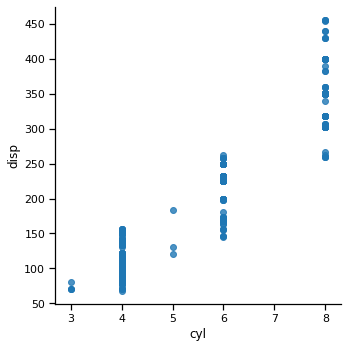

In [30]:
sns.lmplot(x='cyl',y='disp', data = cardf , fit_reg = False)

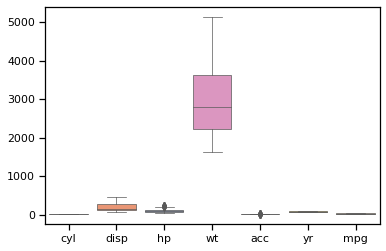

In [31]:

sns.boxplot(data = cardf , linewidth = '0.7',palette='Set2')


Standardize the data

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [32]:
#dropping car namecategorical cloumn
cardf.drop(['car name'],axis = 1 , inplace = True)


In [33]:
#checking data afer dropping car name
cardf.head(10)

cyl   disp     hp    wt   acc  yr   mpg
0    8  307.0  130.0  3504  12.0  70  18.0
1    8  350.0  165.0  3693  11.5  70  15.0
2    8  318.0  150.0  3436  11.0  70  18.0
3    8  304.0  150.0  3433  12.0  70  16.0
4    8  302.0  140.0  3449  10.5  70  17.0
5    8  429.0  198.0  4341  10.0  70  15.0
6    8  454.0  220.0  4354   9.0  70  14.0
7    8  440.0  215.0  4312   8.5  70  14.0
8    8  455.0  225.0  4425  10.0  70  14.0
9    8  390.0  190.0  3850   8.5  70  15.0

In [34]:
cardf.shape
# the shape of the car data afer removing missing values and car name column

(392, 7)

In [35]:
#applying zscore to standardise the data
cardf_z = cardf.apply(zscore)

In [36]:
##sample dataset after scaling
cardf_z.head(5)

cyl      disp        hp        wt       acc        yr       mpg
0  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315 -0.698638
1  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315 -1.083498
2  1.483947  1.182542  1.184397  0.540382 -1.648189 -1.625315 -0.698638
3  1.483947  1.048584  1.184397  0.536845 -1.285258 -1.625315 -0.955212
4  1.483947  1.029447  0.924265  0.555706 -1.829655 -1.625315 -0.826925

K - Means Clustering

Every cluster is assocciated with centroid, labels and cluster Inertia .
initializing the cluster_error

In [37]:
cluster_range = range (1,11)
cluster_error = []
for num_clus in cluster_range:
    clusters = KMeans(n_clusters = num_clus , n_init = 10, random_state=2)
    clusters.fit(cardf_z)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_
    cluster_error.append(clusters.inertia_)
    

In [38]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error } )
clusters_df
#Let us print the inertia value for all K values.

num_clusters  cluster_errors
0             1     2744.000000
1             2     1272.900760
2             3      928.617487
3             4      725.309400
4             5      654.727546
5             6      584.793147
6             7      533.926585
7             8      490.107795
8             9      448.211350
9            10      418.638236

Using elbow plot to find the number of clusters :
The total sum of squared distances of every data point from respective centroid is also called inertia.  That K at which the inertia stop to drop significantly (elbow method) will be the best K.

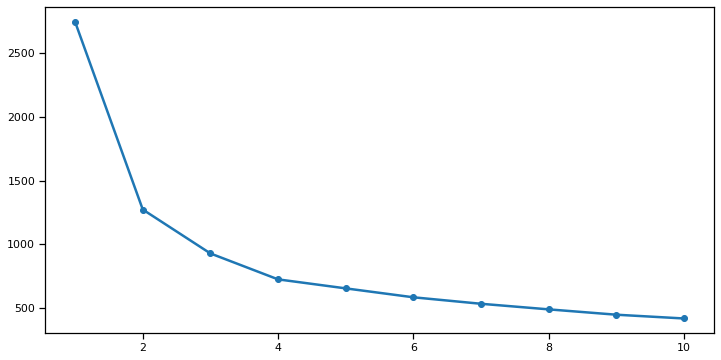

In [39]:
plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters , clusters_df.cluster_errors, marker = "o")

From the elbow plot it can be inferred that there are 3 clusters in the dataset as there is inertia drop till 3 and there is no drop in inertia after 3 clusters

Cannot conclude on cluster using elbow plot alone using silhoutte score as well to predict the number of clusters

In [40]:
#using n_init as 15
cluster_range = range (2,15)
cluster_sillhouttescore = []
cluster_error = []
for num_clus in cluster_range:
    clusters = KMeans(n_clusters = num_clus , n_init = 10)
    clusters.fit(cardf_z)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_
    cluster_error.append(clusters.inertia_)
    #using euclidean distance as distance calculation formula while finding out the silhoute score
    cluster_sillhouttescore.append(metrics.silhouette_score(cardf_z, labels, metric='euclidean'))
   

In [41]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error ,"Avg Sil Score": cluster_sillhouttescore  } )
clusters_df

num_clusters  cluster_errors  Avg Sil Score
0              2     1272.900760       0.481209
1              3      928.617487       0.354494
2              4      725.327184       0.348754
3              5      656.444619       0.334029
4              6      585.091210       0.273429
5              7      534.447803       0.274416
6              8      488.151989       0.273624
7              9      446.137952       0.266088
8             10      415.567244       0.263296
9             11      393.733698       0.263692
10            12      375.547636       0.262025
11            13      354.975579       0.263433
12            14      337.082128       0.259170

For the maximum silhoute score f 0.34 for k value of 3, the cluster error is 928.61 . To bein with considering cluster size as 3 and start with our analysis

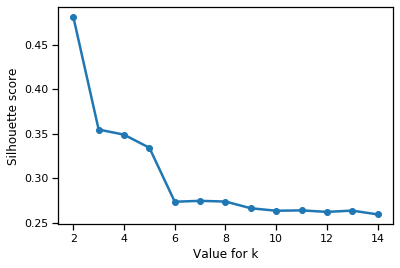

In [42]:
#plotting of silhouttescore and nmber of cluster
plt.plot(cluster_range, cluster_sillhouttescore, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.show()

In [44]:
##considering n_init as 10 first . Number of tims K-means will iterate with different centroid seeds.Uses euclidean distance calcultaion matrix
cluster = KMeans(n_clusters=2, n_init = 10, random_state=2)
cluster.fit(cardf_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [45]:
#prinitng centroids of the three cluster
centroids = cluster.cluster_centers_
centroids
##centroid of 7 different attributes cyl,disp ,hp,wt,acc,yr,mpg

array([[-0.52654535, -0.51598601, -0.509452  , -0.48137723,  0.35501413,
         0.22242724,  0.40337487],
       [ 1.43922397,  1.41036176,  1.39250213,  1.31576444, -0.97037195,
        -0.60796778, -1.10255797]])

 Store the centroids in a dataframe with column names from the original dataset given 

In [46]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(cardf_z) )
centroid_df

cyl      disp        hp        wt       acc        yr       mpg
0 -0.526545 -0.515986 -0.509452 -0.481377  0.355014  0.222427  0.403375
1  1.439224  1.410362  1.392502  1.315764 -0.970372 -0.607968 -1.102558

creating a new dataframe only for labels and converting it into categorical variable

In [47]:

df_labels = pd.DataFrame(cluster.labels_ , columns = list(['class']))

df_labels['class'] = df_labels['class'].astype('category')

In [48]:
# Joining the label dataframe with the car data frame to create cardf_labeled. Note: it could be appended to original dataframe
cardf_labeled = cardf_z.join(df_labels)

In [49]:
#finding the count of the diffrent class
cardf_labeled['class'].value_counts()

0    281
1    105
Name: class, dtype: int64

In [50]:
cardf_labeled.groupby("class").count()

cyl  disp   hp   wt  acc   yr  mpg
class                                    
0      281   281  281  281  281  281  281
1      105   105  105  105  105  105  105

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


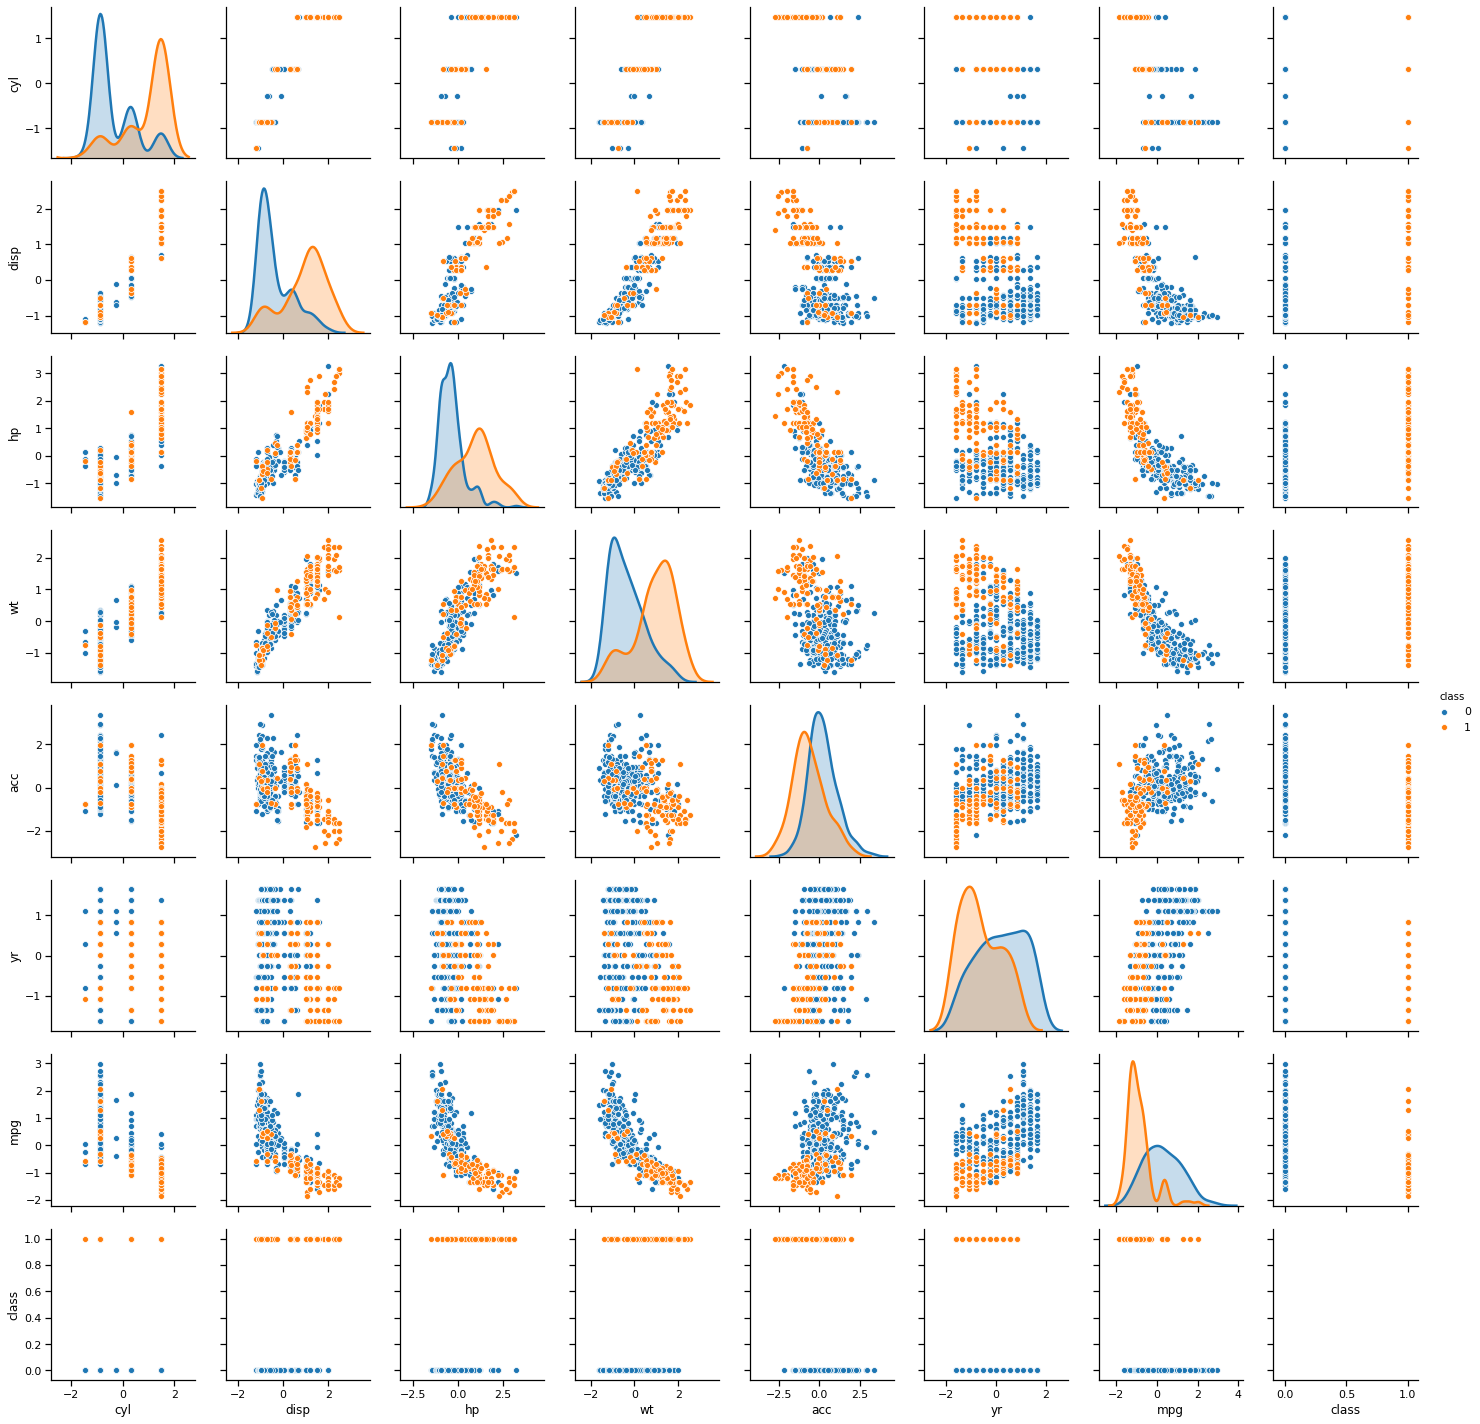

In [50]:
sns.pairplot(cardf_labeled, hue = 'class' , diag_kind='kde')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

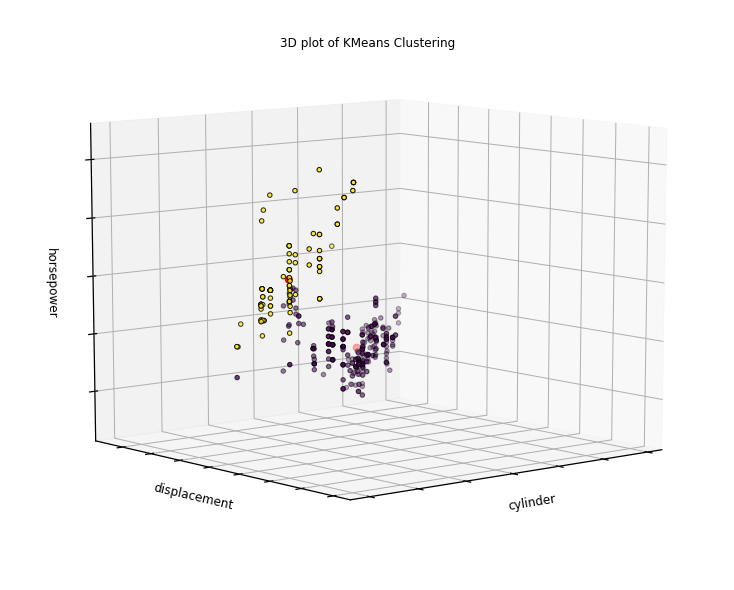

In [49]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster.labels_
ax.scatter(cardf_labeled.iloc[:, 0], cardf_labeled.iloc[:, 1], cardf_labeled.iloc[:, 2],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('displacement')
ax.set_zlabel('horsepower')
ax.set_title('3D plot of KMeans Clustering')


We have taken 3 attibutes for plottig the 3d visualization of the data. The red dot indicate the centroid of the cluster

Considering n_init as 15 and cluster size as 2 to find out the number of cluster

In [51]:
##considering n_init as 10 first . Number of tims K-means will iterate with different centroid seeds
cluster1 = KMeans(n_clusters=2, n_init = 15, random_state=2)
cluster1.fit(cardf_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [52]:
#printng centroids of the three cluster
centroids1 = cluster1.cluster_centers_
centroids1
##centroid of 7 different attributes cyl,disp ,hp,wt,acc,yr,mpg

array([[-0.52654535, -0.51598601, -0.509452  , -0.48137723,  0.35501413,
         0.22242724,  0.40337487],
       [ 1.43922397,  1.41036176,  1.39250213,  1.31576444, -0.97037195,
        -0.60796778, -1.10255797]])

In [53]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid1_df = pd.DataFrame(centroids1, columns = list(cardf_z) )
centroid1_df

cyl      disp        hp        wt       acc        yr       mpg
0 -0.526545 -0.515986 -0.509452 -0.481377  0.355014  0.222427  0.403375
1  1.439224  1.410362  1.392502  1.315764 -0.970372 -0.607968 -1.102558

In [54]:
df1_labels = pd.DataFrame(cluster1.labels_ , columns = list(['class']))

df1_labels['class'] = df_labels['class'].astype('category')

In [55]:
# Joining the label dataframe with the car data frame to create cardf_labeled. Note: it could be appended to original dataframe
cardf1_labeled = cardf_z.join(df_labels)

In [56]:
#finding the count of the diffrent class
cardf1_labeled['class'].value_counts()

0    281
1    105
Name: class, dtype: int64

In [57]:
cardf1_labeled.groupby("class").count()

cyl  disp   hp   wt  acc   yr  mpg
class                                    
0      281   281  281  281  281  281  281
1      105   105  105  105  105  105  105

Text(0.5, 0.92, '3D plot of KMeans Clustering')

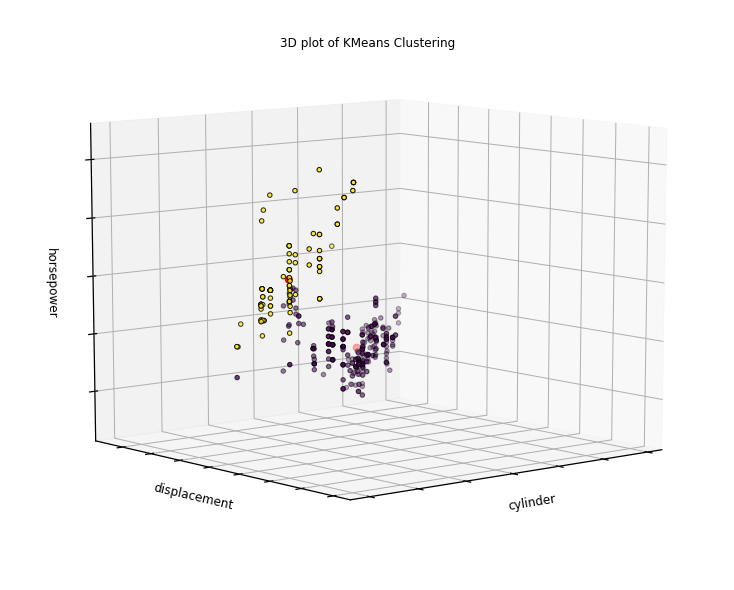

In [58]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster1.labels_
ax.scatter(cardf1_labeled.iloc[:, 0], cardf1_labeled.iloc[:, 1], cardf1_labeled.iloc[:, 2],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids1[:, 0], centroids1[:, 1],centroids1[:, 2], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('displacement')
ax.set_zlabel('horsepower')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

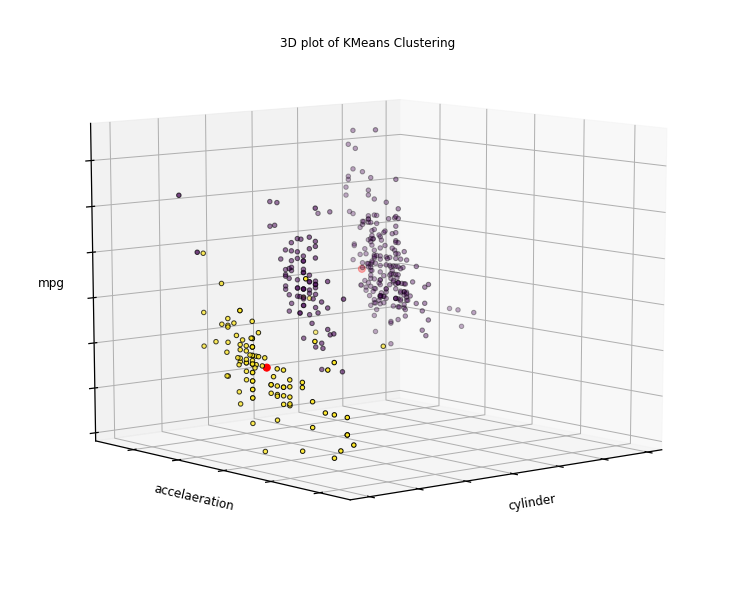

In [59]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster1.labels_
ax.scatter(cardf1_labeled.iloc[:, 0], cardf1_labeled.iloc[:, 2], cardf1_labeled.iloc[:, 4],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids1[:, 0], centroids1[:, 2],centroids1[:, 4], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('accelaeration')
ax.set_zlabel('mpg')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

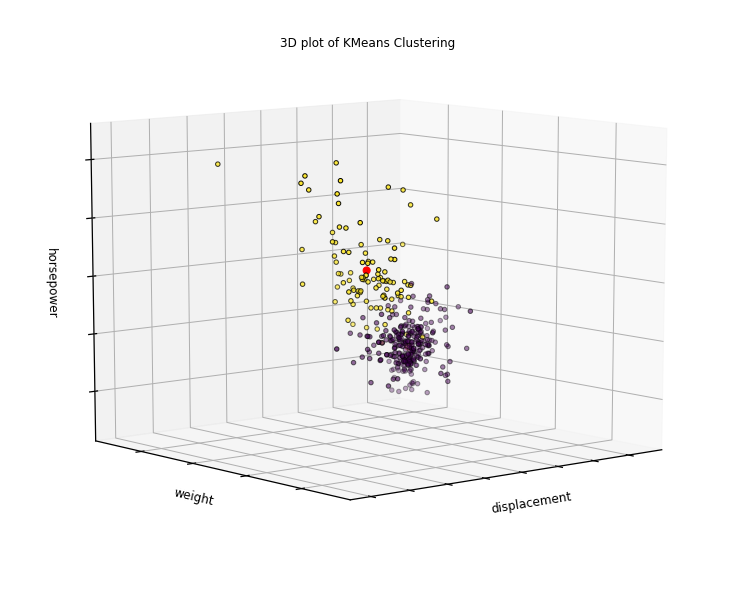

In [60]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster1.labels_
ax.scatter(cardf1_labeled.iloc[:, 1], cardf1_labeled.iloc[:, 3], cardf1_labeled.iloc[:, 2],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids1[:, 1], centroids1[:, 3],centroids1[:, 2], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('displacement')
ax.set_ylabel('weight')
ax.set_zlabel('horsepower')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

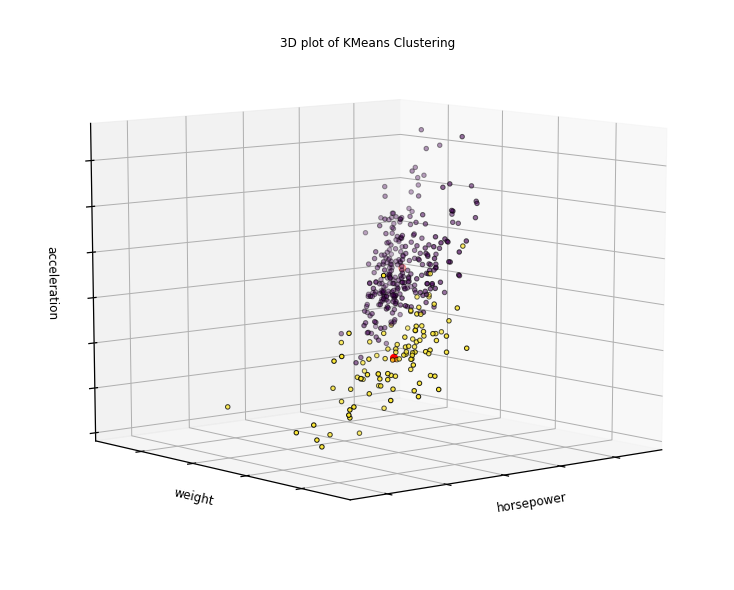

In [61]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster1.labels_
ax.scatter(cardf1_labeled.iloc[:, 2], cardf1_labeled.iloc[:, 3], cardf1_labeled.iloc[:, 4],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids1[:, 2], centroids1[:, 3],centroids1[:, 4], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('acceleration')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

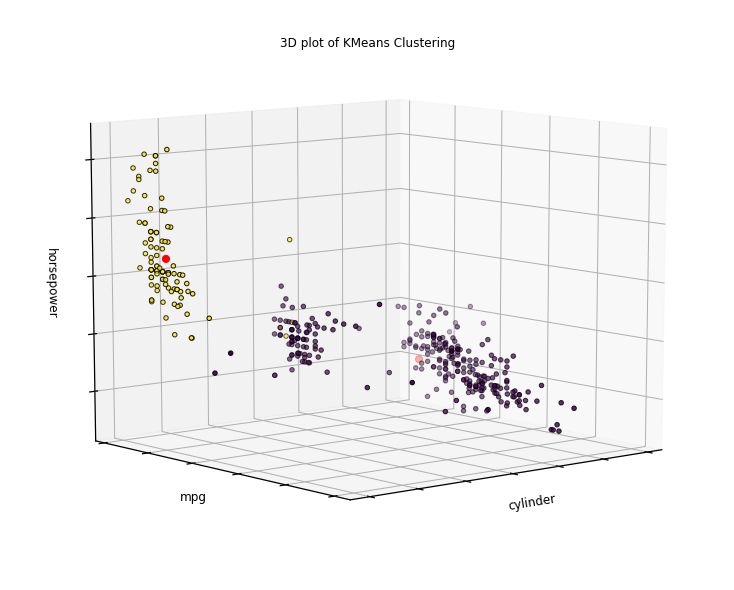

In [62]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster1.labels_
ax.scatter(cardf1_labeled.iloc[:,0], cardf1_labeled.iloc[:, 6], cardf1_labeled.iloc[:, 2],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids1[:, 0], centroids1[:, 6],centroids1[:, 2], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('mpg')
ax.set_zlabel('horsepower')
ax.set_title('3D plot of KMeans Clustering')

In [63]:
cluster1.inertia_

1272.9007603914606

The inertia, centroid , labels are same for different n_init 10 and 15

From the above all 3-D plots with n_init 10 and 15 and cluster size a 3, it is evident that there are more than 2 clusters in the data frame , will consider cluster size as 3 and proceed with the K-means clustering

Considering cluster size as 3

In [64]:
##considering n_init as 10 first . Number of tims K-means will iterate with different centroid seeds
cluster3 = KMeans(n_clusters=3, n_init = 10, random_state=2)
cluster3.fit(cardf_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [65]:
#prinitng centroids of the three cluster
centroids3 = cluster3.cluster_centers_
centroids3
##centroid of 7 different attributes cyl,disp ,hp,wt,acc,yr,mpg


array([[-0.86110766, -0.81098162, -0.6843036 , -0.79514908,  0.36356374,
         0.30830628,  0.76382895],
       [ 1.48394702,  1.48591152,  1.49929313,  1.38738246, -1.06597113,
        -0.66682598, -1.15155766],
       [ 0.3470398 ,  0.2384915 , -0.04424757,  0.30335558,  0.29291981,
         0.01126948, -0.4725839 ]])

In [66]:
df3_labels = pd.DataFrame(cluster3.labels_ , columns = list(['class']))

df3_labels['class'] = df3_labels['class'].astype('category')

In [67]:
# Joining the label dataframe with the car data frame to create cardf_labeled. Note: it could be appended to original dataframe
cardf3_labeled = cardf_z.join(df3_labels)

In [68]:
#finding the count of the diffrent class
cardf3_labeled['class'].value_counts()

0    199
1     95
2     92
Name: class, dtype: int64

In [69]:
cardf3_labeled.groupby("class").count()


cyl  disp   hp   wt  acc   yr  mpg
class                                    
0      199   199  199  199  199  199  199
1       95    95   95   95   95   95   95
2       92    92   92   92   92   92   92

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


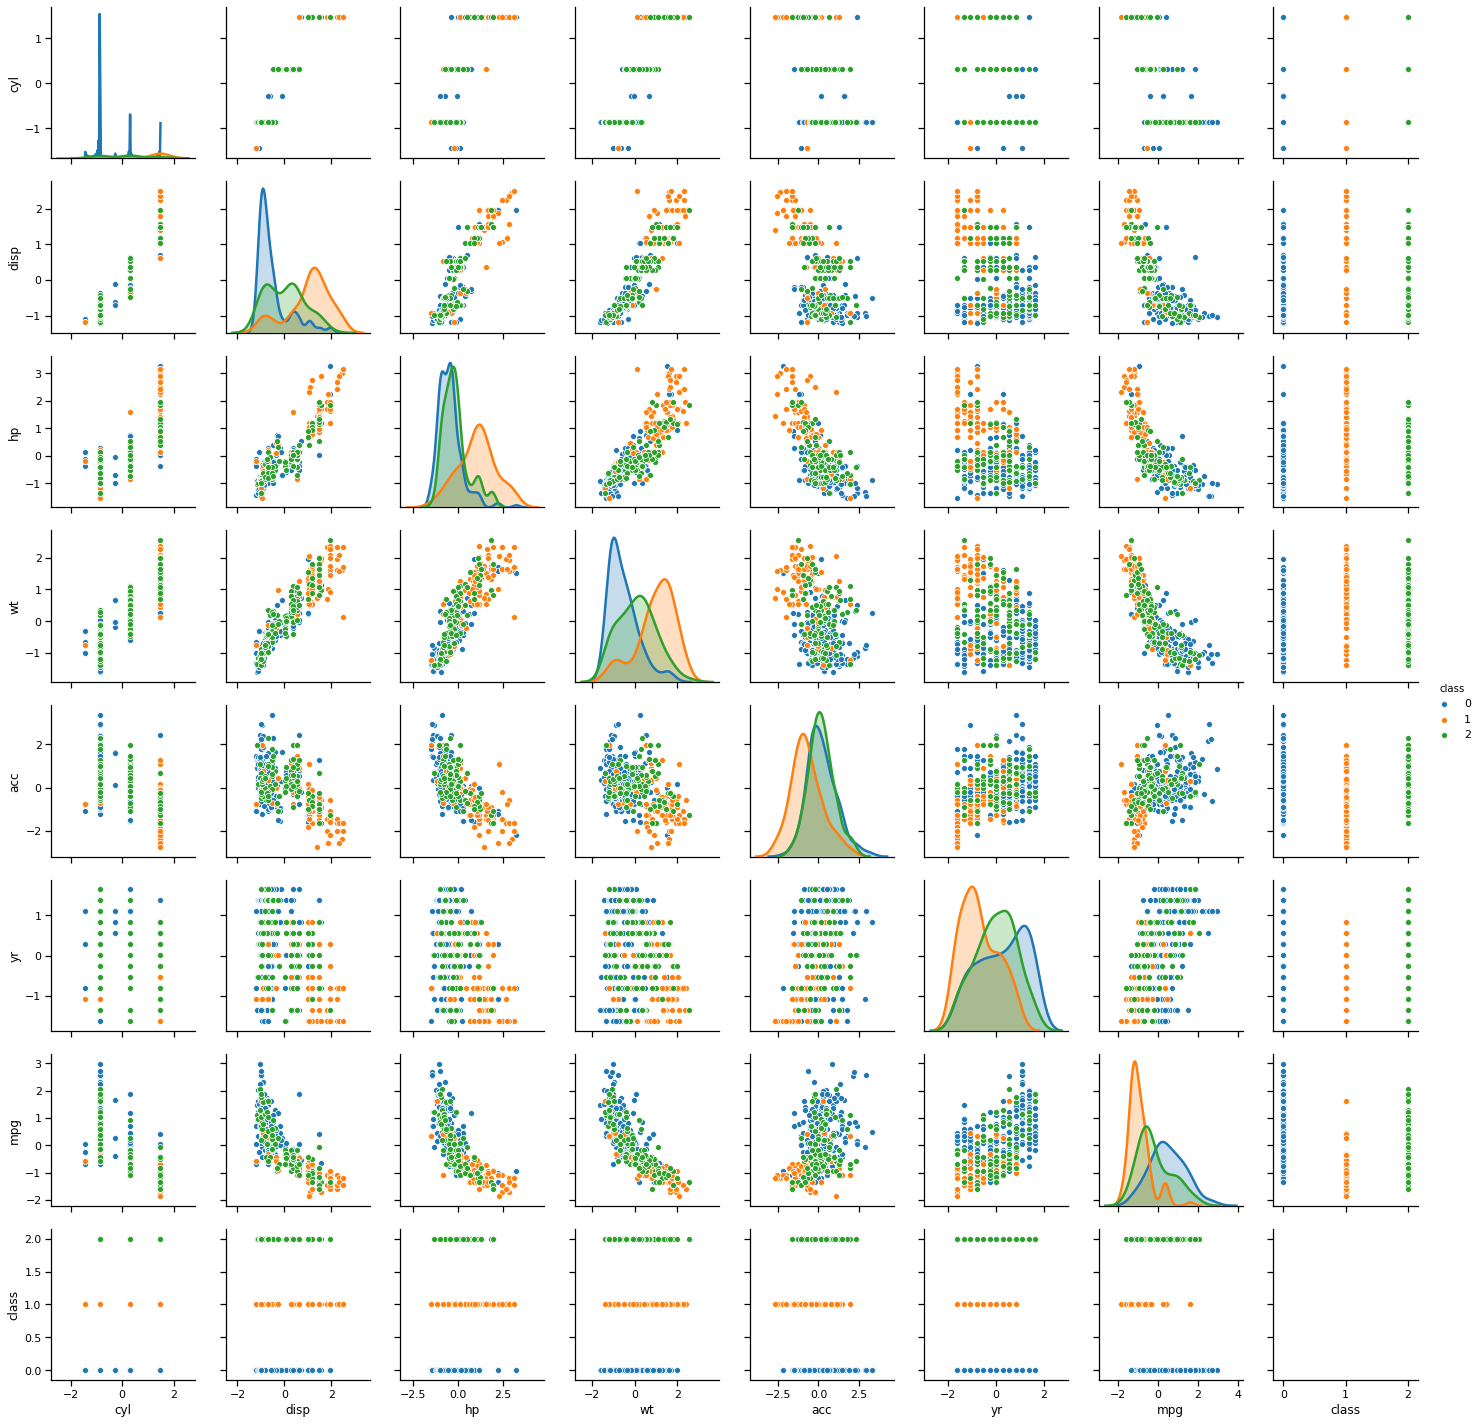

In [70]:
sns.pairplot(cardf3_labeled, hue = 'class' , diag_kind='kde')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

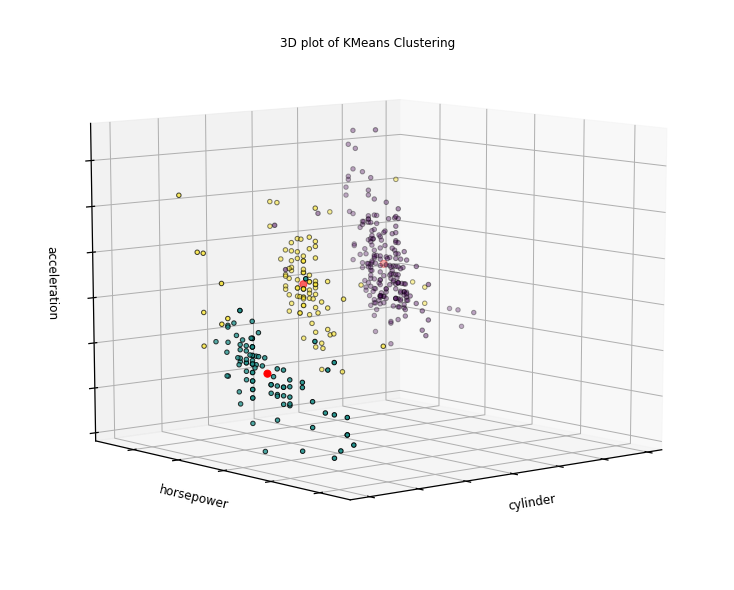

In [69]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster3.labels_
ax.scatter(cardf3_labeled.iloc[:, 0], cardf3_labeled.iloc[:, 2], cardf3_labeled.iloc[:, 4],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids3[:, 0], centroids3[:, 2],centroids3[:, 4], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('horsepower')
ax.set_zlabel('acceleration')
ax.set_title('3D plot of KMeans Clustering')
	

Text(0.5, 0.92, '3D plot of KMeans Clustering')

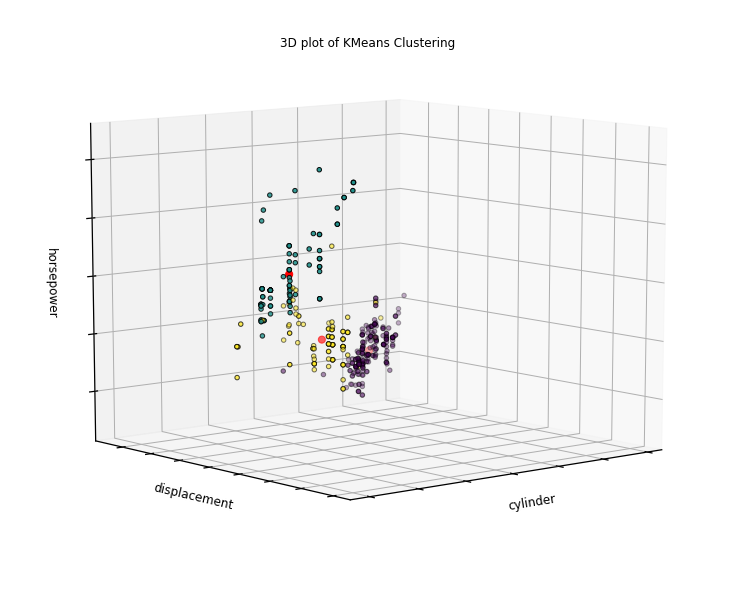

In [70]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster3.labels_
ax.scatter(cardf3_labeled.iloc[:, 0], cardf3_labeled.iloc[:, 1], cardf3_labeled.iloc[:, 2],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids3[:, 0], centroids3[:, 1],centroids3[:, 2], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('displacement')
ax.set_zlabel('horsepower')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

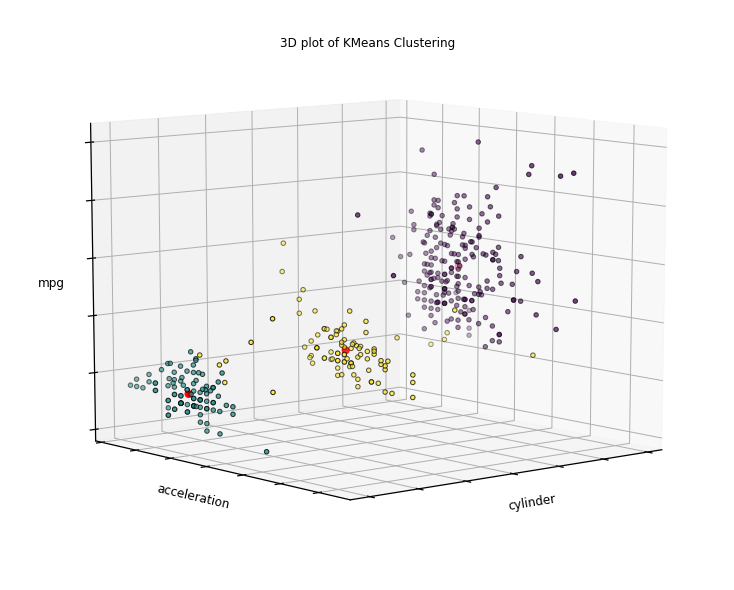

In [71]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster3.labels_
ax.scatter(cardf3_labeled.iloc[:, 0], cardf3_labeled.iloc[:, 4], cardf3_labeled.iloc[:, 6],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids3[:, 0], centroids3[:, 4],centroids3[:, 6], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('acceleration')
ax.set_zlabel('mpg')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

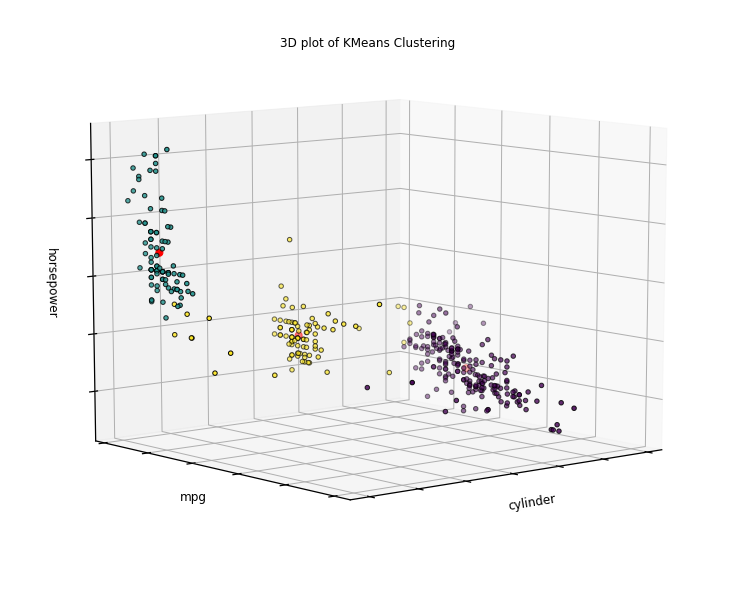

In [72]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster3.labels_
ax.scatter(cardf3_labeled.iloc[:, 0], cardf3_labeled.iloc[:, 6], cardf3_labeled.iloc[:, 2],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids3[:, 0], centroids3[:, 6],centroids3[:, 2], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('mpg')
ax.set_zlabel('horsepower')
ax.set_title('3D plot of KMeans Clustering')

From the above 3dplots we could find 3 separate clusters.

In [71]:
cluster3.inertia_

928.6174874954402

In [72]:
#forming separatedataframe from the results obtained from 3 different clusters
car_clusters3 = cardf3_labeled.groupby(['class'])
df30=car_clusters3.get_group(0)
df31=car_clusters3.get_group(1)
df32=car_clusters3.get_group(2)


In [73]:
#printing the shape of the data
df30.shape,df31.shape,df32.shape


((199, 8), (95, 8), (92, 8))

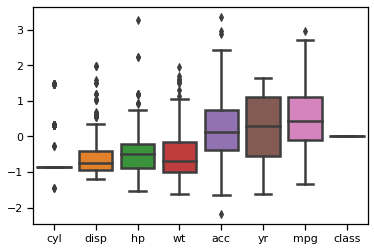

In [74]:
#in the newly obtaine data using box plot to check for any outliers
sns.boxplot(data = df30)

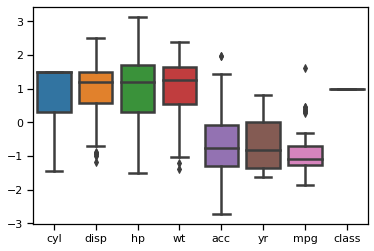

In [75]:
sns.boxplot(data = df31)

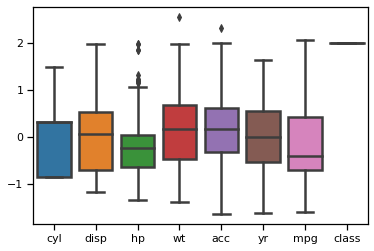

In [76]:
sns.boxplot(data = df32)

when th cluster size is 3, there are outliers in the dataset formed using 3 different clusters

In [77]:
c30=cluster3.cluster_centers_[0,:]
c31=cluster3.cluster_centers_[1,:]
c32=cluster3.cluster_centers_[2,:]

In [78]:
c30, c31,c32

(array([-0.86110766, -0.81098162, -0.6843036 , -0.79514908,  0.36356374,
         0.30830628,  0.76382895]),
 array([ 1.48394702,  1.48591152,  1.49929313,  1.38738246, -1.06597113,
        -0.66682598, -1.15155766]),
 array([ 0.3470398 ,  0.2384915 , -0.04424757,  0.30335558,  0.29291981,
         0.01126948, -0.4725839 ]))

From the above 3d visual graph we could find 3 clusters with few outliers. We are considering cluster size as 4 to check if there exist 4th cluster using 3d plot

In [79]:

cluster4 = KMeans(n_clusters=4, n_init = 10, random_state=1)
y_kmeans = cluster4.fit_predict(cardf_z)


In [80]:
#prinitng centroids of the three cluster
centroids4 = cluster4.cluster_centers_
centroids4

array([[ 1.48394702,  1.48913886,  1.50679413,  1.39145217, -1.0759934 ,
        -0.68265368, -1.1566489 ],
       [ 0.41549305,  0.30031222, -0.03530064,  0.34141577,  0.30633818,
         0.06662814, -0.49265912],
       [-0.85814365, -0.80247472, -0.55744679, -0.75309477,  0.3207127 ,
        -0.63048922,  0.2066802 ],
       [-0.83170217, -0.79320521, -0.75919461, -0.78782597,  0.38355974,
         1.1127382 ,  1.21012512]])

In [81]:
##centroid of 7 different attributes cyl,disp ,hp,wt,acc,yr,mpg

df4_labels = pd.DataFrame(cluster4.labels_ , columns = list(['class']))

df4_labels['class'] = df4_labels['class'].astype('category')

In [82]:
# Joining the label dataframe with the car data frame to create cardf_labeled. Note: it could be appended to original dataframe
cardf4_labeled = cardf_z.join(df4_labels)

In [83]:
#finding the count of the diffrent class
cardf4_labeled['class'].value_counts()



3    105
2    100
0     94
1     87
Name: class, dtype: int64

In [84]:
cardf4_labeled.groupby("class").count()

cyl  disp   hp   wt  acc   yr  mpg
class                                    
0       94    94   94   94   94   94   94
1       87    87   87   87   87   87   87
2      100   100  100  100  100  100  100
3      105   105  105  105  105  105  105

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


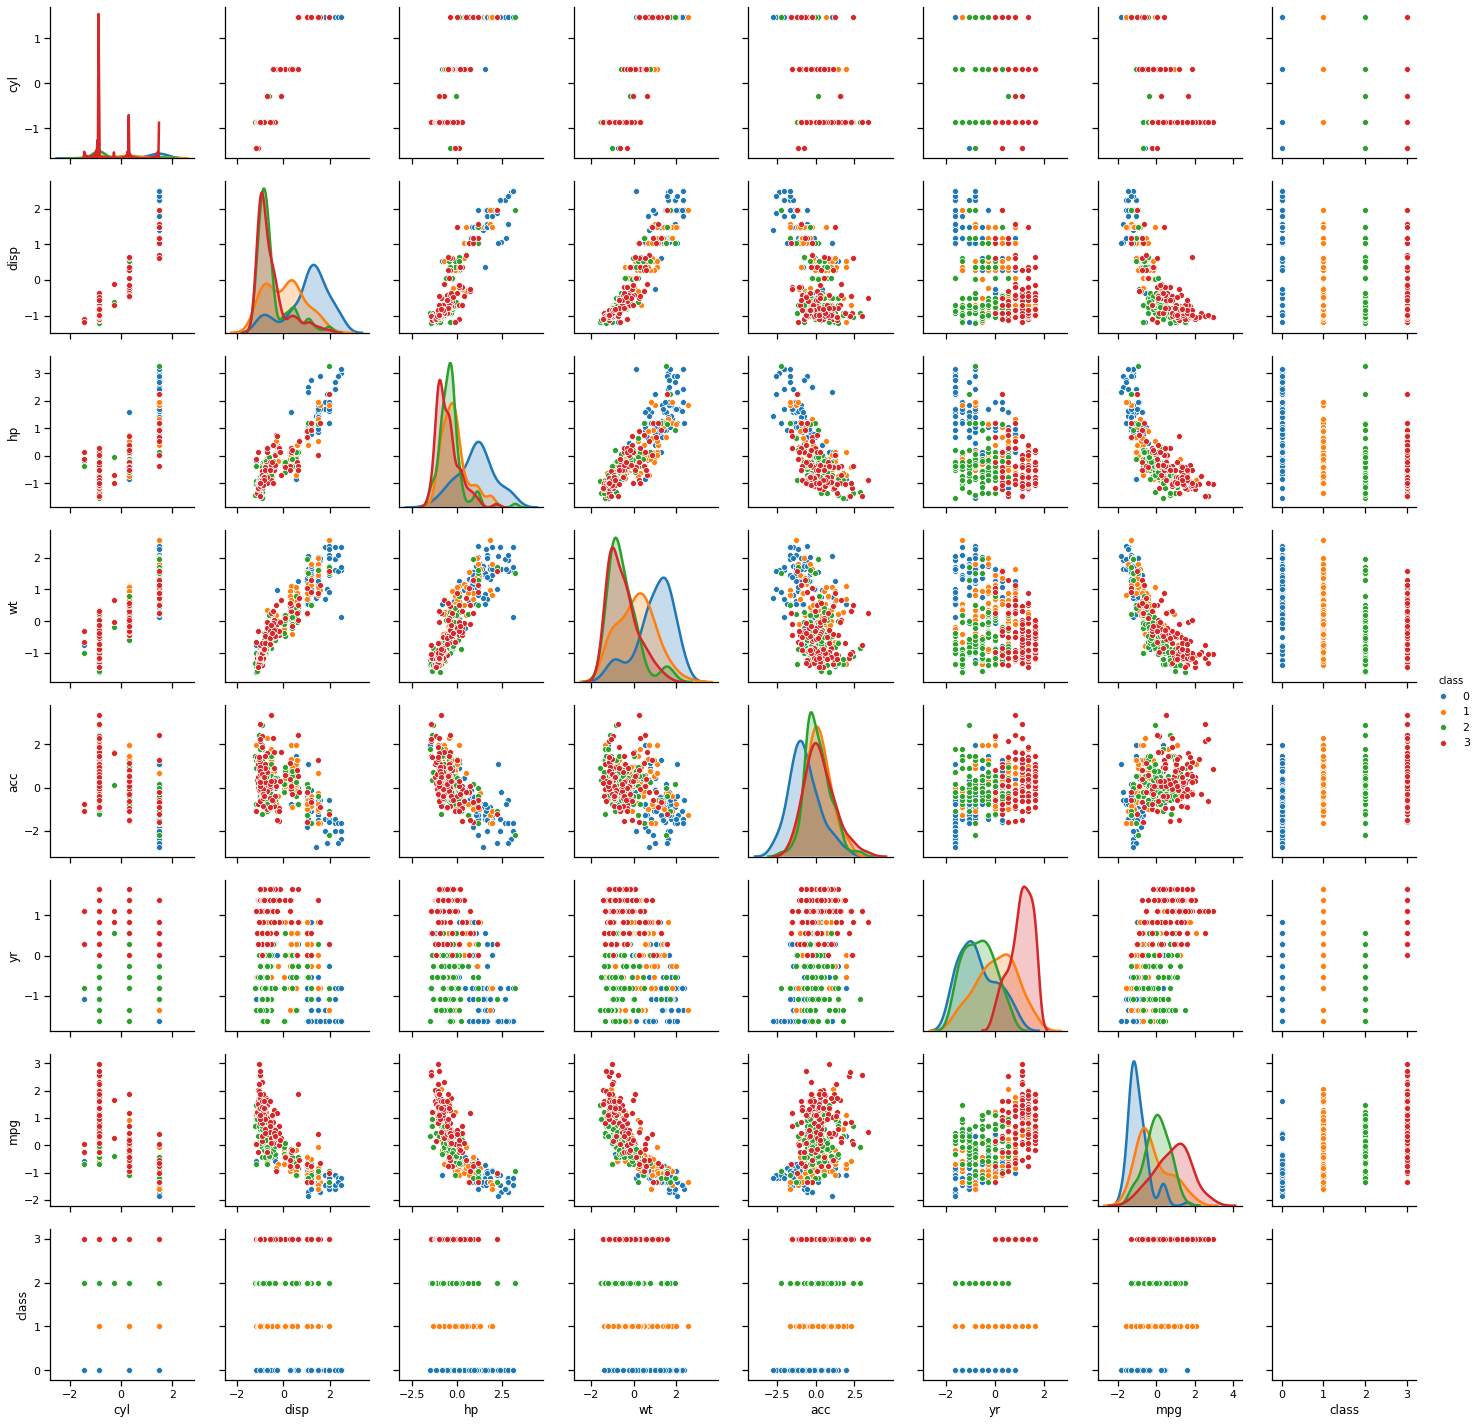

In [90]:
sns.pairplot(cardf4_labeled, hue = 'class' , diag_kind='kde')

In [85]:
#four dataframe formed from four clusters
car_clusters4 = cardf4_labeled.groupby(['class'])
df40=car_clusters4.get_group(0)
df41=car_clusters4.get_group(1)
df42=car_clusters4.get_group(2)
df43=car_clusters4.get_group(3)


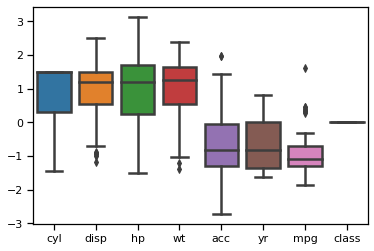

In [86]:
#using boxplot to find out utliers in the different dataframe obtained from 4 clusters
sns.boxplot(data = df40)

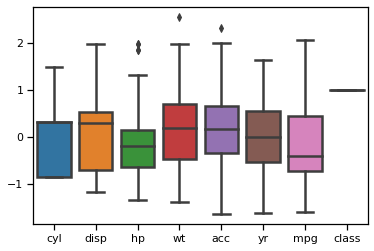

In [87]:
sns.boxplot(data = df41)

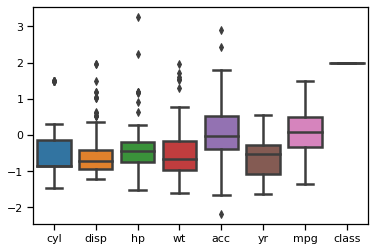

In [88]:
sns.boxplot(data = df42)

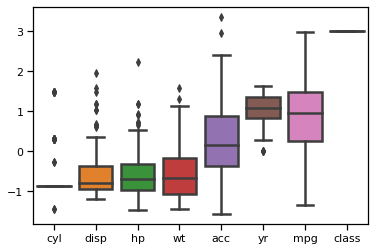

In [89]:
sns.boxplot(data = df43)

When the cluster size is 4, still there are outliers in the dataset formed using 4 different clusters

Text(0.5, 0.92, '3D plot of KMeans Clustering')

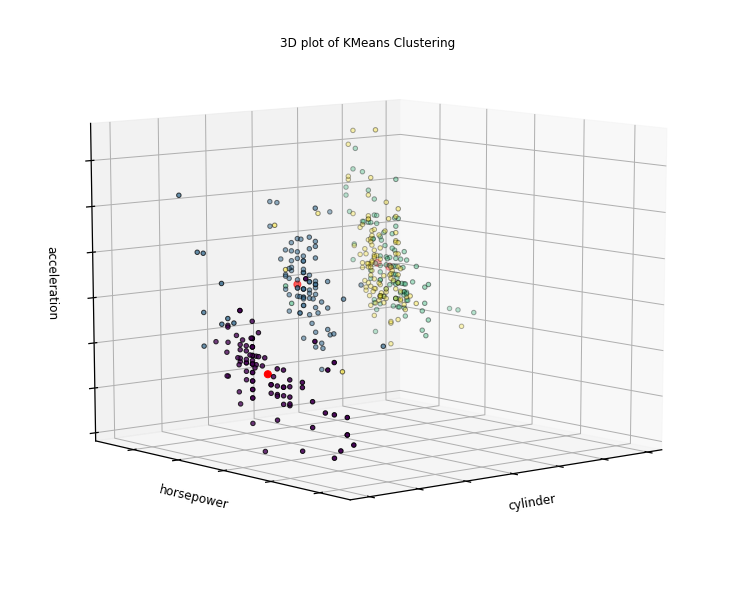

In [90]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster4.labels_
ax.scatter(cardf4_labeled.iloc[:, 0], cardf4_labeled.iloc[:, 2], cardf4_labeled.iloc[:, 4],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids4[:, 0], centroids4[:, 2],centroids4[:, 4], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('horsepower')
ax.set_zlabel('acceleration')
ax.set_title('3D plot of KMeans Clustering')

From this 3d plot we could not separate the fourth cluster.There are chances of subcuster in the third cluster.

Text(0.5, 0.92, '3D plot of KMeans Clustering')

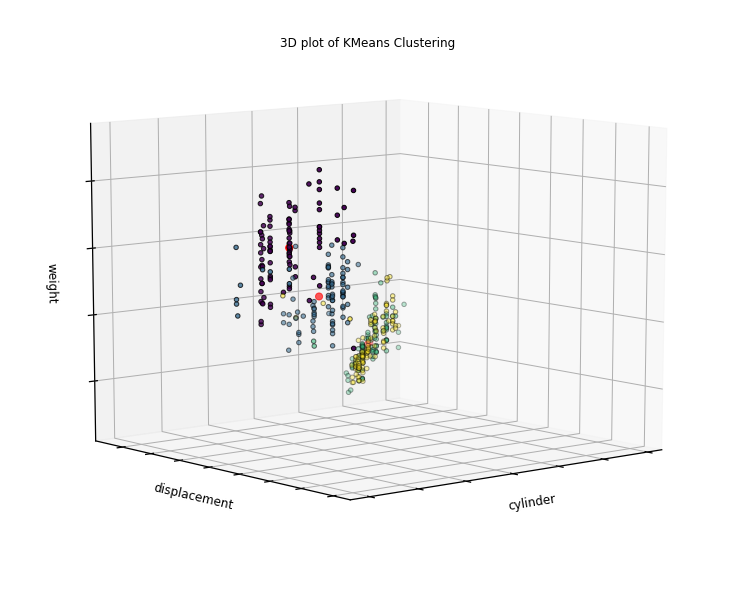

In [91]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster4.labels_
ax.scatter(cardf4_labeled.iloc[:, 0], cardf4_labeled.iloc[:, 1], cardf4_labeled.iloc[:, 3],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids4[:, 0], centroids4[:, 1],centroids4[:, 3], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('displacement')
ax.set_zlabel('weight')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

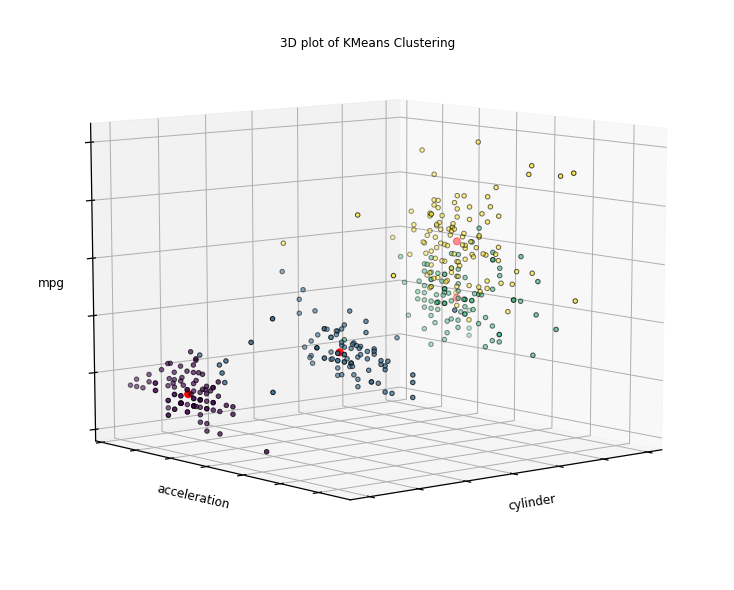

In [92]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster4.labels_
ax.scatter(cardf4_labeled.iloc[:, 0], cardf4_labeled.iloc[:, 4], cardf4_labeled.iloc[:, 6],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids4[:, 0], centroids4[:, 4],centroids4[:, 6], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('acceleration')
ax.set_zlabel('mpg')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

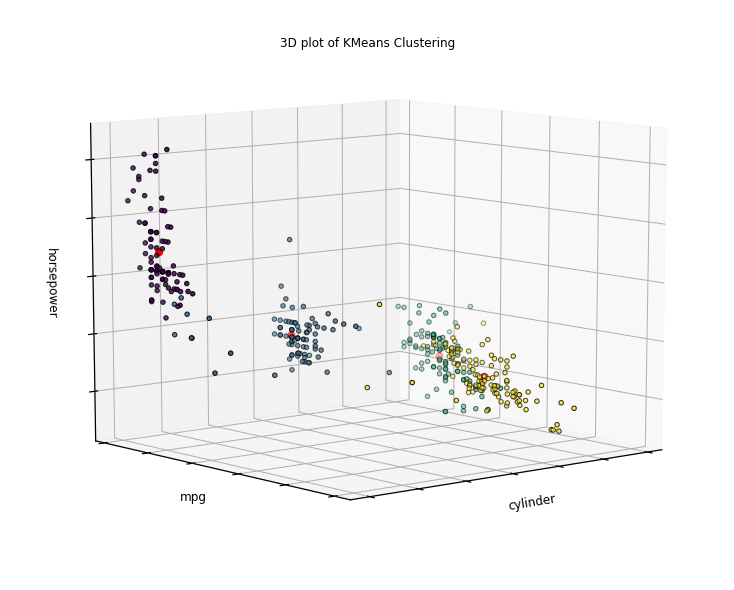

In [93]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster4.labels_
ax.scatter(cardf4_labeled.iloc[:, 0], cardf4_labeled.iloc[:, 6], cardf4_labeled.iloc[:, 2],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroids4[:, 0], centroids4[:, 6],centroids4[:, 2], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('mpg')
ax.set_zlabel('horsepower')
ax.set_title('3D plot of KMeans Clustering')

From elbow plot,3-D scatter plot and silhoutte score we could clearly find that there are three clusters in the datasets. When cluster is considered as 3 we could see the clear separation of 3 clusters. Similarly when cluster is considered as 4 there is no separation of 4th cluster it is overlapping with the 3rd cluster which could possibly be a sub cluster. From box plot it is also observed that cluster size 3 and 4 has some outliers associated with it.
K-mean has limitation of finding subclusters , we are using hierarchial clustering to find out if there are any sub-clusters in the dataset.

Verifying the optimal K using bottom up approach (agglomerative) hierarchial clustering to decide the number of clusters


In [95]:
#considering cluster size as 3 initally.
#With ward linkage only euclidean  distance can be used for predicting the distance
#we are using single linkage and manhattan distance to predict the distance. as the data is elongated we go for single linkage method
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan',  linkage='single')
model.fit(cardf_z)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [96]:

hierar_labels = pd.DataFrame(model.labels_ , columns = list(['class']))

hierar_labels['class'] = hierar_labels['class'].astype('category')

In [97]:
# Joining the label dataframe with the car data frame to create cardf_labeled. Note: it could be appended to original dataframe
cardfhier_labeled = cardf_z.join(hierar_labels)

In [98]:
#finding the count of the diffrent class
cardfhier_labeled['class'].value_counts()

0    384
2      1
1      1
Name: class, dtype: int64

In [99]:
#finding the count of the diffrent class
cardfhier_labeled.groupby('class').count()

cyl  disp   hp   wt  acc   yr  mpg
class                                    
0      384   384  384  384  384  384  384
1        1     1    1    1    1    1    1
2        1     1    1    1    1    1    1

In [100]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering . Finding best score between different linkage method ward, average and complete

Z = linkage(cardf_z, 'ward')
c, coph_dists = cophenet(Z , pdist(cardf_z))
print('shape is ',Z.shape)
print('score is',c)

shape is  (391, 4)
score is 0.7682471022485758


In [101]:
Z1 = linkage(cardf_z, 'average')
c1, coph_dists = cophenet(Z1 , pdist(cardf_z))
print('shape is ',Z1.shape)
print('score is',c1)


shape is  (391, 4)
score is 0.7877151825771717


In [102]:
Z2 = linkage(cardf_z, 'complete')
c2, coph_dists = cophenet(Z2 , pdist(cardf_z))
print('shape is ',Z2.shape)
print('score is',c2)


shape is  (391, 4)
score is 0.7496009331723864


The linkage score would be high if the clusters are tight. Using dendogram to predict the cluster size

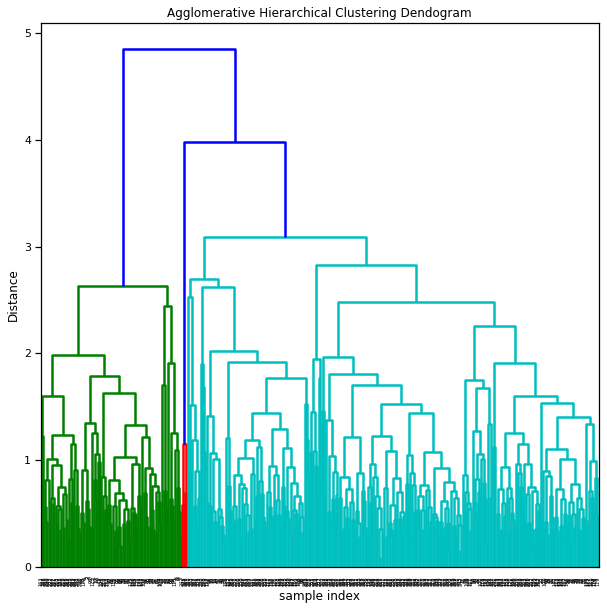

In [103]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1 )
plt.show()

From the above dendgram we could not clearly predict the number of clusters. Roughly we could see 3 logical clusters in the dataset at a distance of 2.8. Using  dendogram parameters to predict the clear number of clusters

Text(0, 0.5, 'Distance')

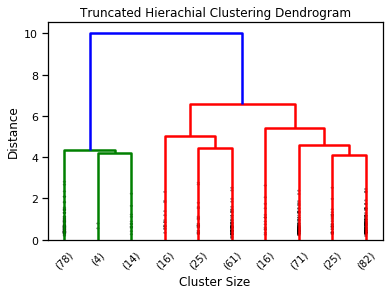

In [104]:
#generate dendrogram using complete linkage
dendrogram(Z2,truncate_mode= "lastp", p = 10, leaf_rotation=45,leaf_font_size=10, show_contracted=True)

plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

From the above dendogram of complete linkage we can find clearly three clusters.

Text(0, 0.5, 'Distance')

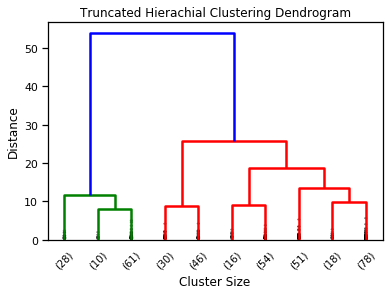

In [105]:
#generate dendrogram using ward  linkage
dendrogram(Z,truncate_mode= "lastp", p = 10, leaf_rotation=45,leaf_font_size=10, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")


From ward linkage as well we can find 3 clusters

Text(0, 0.5, 'Distance')

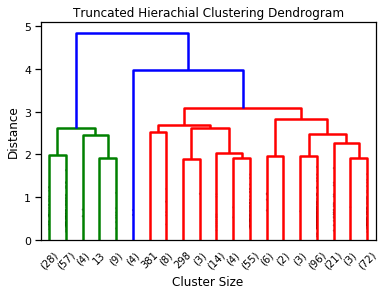

In [107]:
#generate dendrogram using average linkage
dendrogram(Z1,truncate_mode= "lastp", p =20, leaf_rotation=45,leaf_font_size=10, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")


From average linkage as well we could find 4 clusters. One single datapoint is considered as cluster which could possibly be an outlier.

From hierarchial clustering we could find that there are 3 clusters in the dataset

For our use case we are considering cluster size as 3 as optimal, as in most cases the evident clusters were 3 in K-means and agglomerative clustering.

In [108]:
df30.shape , df31.shape , df32.shape

((199, 8), (95, 8), (92, 8))

In [109]:
df30.describe().T

count      mean       std       min       25%       50%       75%  \
cyl   199.0 -0.492351  0.739462 -1.451004 -0.864014 -0.864014 -0.864014   
disp  199.0 -0.502678  0.687283 -1.209563 -0.932079 -0.750279 -0.415384   
hp    199.0 -0.439663  0.676981 -1.520975 -0.896659 -0.506461 -0.220316   
wt    199.0 -0.517762  0.699575 -1.608575 -1.009154 -0.686752 -0.171026   
acc   199.0  0.228840  0.919188 -2.192586 -0.377930  0.130174  0.747157   
yr    199.0  0.269162  1.006292 -1.625315 -0.538074  0.277358  1.092789   
mpg   199.0  0.483919  0.886154 -1.340071 -0.089277  0.430284  1.097374   

           max  
cyl   1.483947  
disp  1.967153  
hp    3.265452  
wt    1.957303  
acc   3.360262  
yr    1.636410  
mpg   2.970359

In [110]:
df31.describe().T

count      mean       std       min       25%       50%       75%  \
cyl    95.0  1.032891  0.823269 -1.451004  0.309967  1.483947  1.483947   
disp   95.0  1.050498  0.926804 -1.190426  0.570163  1.182542  1.498300   
hp     95.0  1.070760  1.036390 -1.520975  0.299948  1.184397  1.704660   
wt     95.0  1.004942  0.885288 -1.388139  0.553349  1.254736  1.640794   
acc    95.0 -0.701130  0.979129 -2.736983 -1.285258 -0.777154 -0.069438   
yr     95.0 -0.669687  0.761465 -1.625315 -1.353505 -0.809884  0.005547   
mpg    95.0 -0.926989  0.562088 -1.853218 -1.275928 -1.083498 -0.698638   

           max  
cyl   1.483947  
disp  2.493416  
hp    3.135386  
wt    2.380493  
acc   1.981123  
yr    0.820978  
mpg   1.623349

In [111]:
df32.describe().T

count      mean       std       min       25%       50%       75%  \
cyl    92.0  0.054754  0.849535 -0.864014 -0.864014  0.309967  0.309967   
disp   92.0  0.044628  0.810391 -1.180858 -0.712005  0.053468  0.531890   
hp     92.0 -0.111174  0.729790 -1.338883 -0.636527 -0.246329  0.046319   
wt     92.0  0.112412  0.870864 -1.394033 -0.478104  0.157860  0.667398   
acc    92.0  0.174357  0.799840 -1.648189 -0.323490  0.166467  0.611058   
yr     92.0  0.002593  0.838013 -1.625315 -0.538074  0.005547  0.549168   
mpg    92.0 -0.156906  0.854620 -1.596645 -0.698638 -0.416408  0.411041   

           max  
cyl   1.483947  
disp  1.967153  
hp    1.964792  
wt    2.549061  
acc   2.307761  
yr    1.636410  
mpg   2.046695

In [112]:
df30.head(5)

cyl      disp        hp        wt       acc        yr       mpg class
14 -0.864014 -0.778984 -0.246329 -0.713864 -0.196464 -1.625315  0.071081     0
18 -0.864014 -0.932079 -0.428421 -0.999134 -0.377930 -1.625315  0.455941     0
19 -0.864014 -0.932079 -1.520975 -1.346881  1.799657 -1.625315  0.327654     0
20 -0.864014 -0.807690 -0.454435 -0.360223  0.710864 -1.625315  0.199368     0
21 -0.864014 -0.836395 -0.376395 -0.645494 -0.377930 -1.625315  0.071081     0

In [113]:
df31.head(5)

cyl      disp        hp        wt       acc        yr       mpg class
0  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315 -0.698638     1
1  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315 -1.083498     1
2  1.483947  1.182542  1.184397  0.540382 -1.648189 -1.625315 -0.698638     1
3  1.483947  1.048584  1.184397  0.536845 -1.285258 -1.625315 -0.955212     1
4  1.483947  1.029447  0.924265  0.555706 -1.829655 -1.625315 -0.826925     1

In [114]:
df32.head(5)

cyl      disp        hp        wt       acc        yr       mpg class
15  0.309967  0.034332 -0.246329 -0.170436 -0.014999 -1.625315 -0.185492     2
16  0.309967  0.043900 -0.194303 -0.239986 -0.014999 -1.625315 -0.698638     2
17  0.309967  0.053468 -0.506461 -0.460422  0.166467 -1.625315 -0.313779     2
24  0.309967  0.043900 -0.376395 -0.388515 -0.196464 -1.625315 -0.313779     2
33  0.309967  0.359658 -0.116263 -0.405018 -0.922327 -1.353505 -0.570352     2

In [115]:
df30.corr()

cyl      disp        hp        wt       acc        yr       mpg
cyl   1.000000  0.927570  0.729813  0.818204 -0.255259 -0.020793 -0.578871
disp  0.927570  1.000000  0.809020  0.904645 -0.293958 -0.023612 -0.652117
hp    0.729813  0.809020  1.000000  0.815067 -0.570139 -0.133911 -0.693012
wt    0.818204  0.904645  0.815067  1.000000 -0.192688  0.009979 -0.699677
acc  -0.255259 -0.293958 -0.570139 -0.192688  1.000000  0.036967  0.251395
yr   -0.020793 -0.023612 -0.133911  0.009979  0.036967  1.000000  0.455931
mpg  -0.578871 -0.652117 -0.693012 -0.699677  0.251395  0.455931  1.000000

In [116]:
df31.corr()

cyl      disp        hp        wt       acc        yr       mpg
cyl   1.000000  0.888389  0.741378  0.840565 -0.565708 -0.252743 -0.791384
disp  0.888389  1.000000  0.857155  0.856209 -0.678749 -0.352170 -0.793599
hp    0.741378  0.857155  1.000000  0.760059 -0.732158 -0.473994 -0.748574
wt    0.840565  0.856209  0.760059  1.000000 -0.416580 -0.230354 -0.872035
acc  -0.565708 -0.678749 -0.732158 -0.416580  1.000000  0.459203  0.398946
yr   -0.252743 -0.352170 -0.473994 -0.230354  0.459203  1.000000  0.441251
mpg  -0.791384 -0.793599 -0.748574 -0.872035  0.398946  0.441251  1.000000

In [117]:
df32.corr()

cyl      disp        hp        wt       acc        yr       mpg
cyl   1.000000  0.953977  0.843832  0.863474 -0.419400 -0.262124 -0.768530
disp  0.953977  1.000000  0.864814  0.918659 -0.373437 -0.296228 -0.823853
hp    0.843832  0.864814  1.000000  0.833010 -0.591575 -0.211003 -0.727274
wt    0.863474  0.918659  0.833010  1.000000 -0.207724 -0.177446 -0.818200
acc  -0.419400 -0.373437 -0.591575 -0.207724  1.000000  0.159341  0.226527
yr   -0.262124 -0.296228 -0.211003 -0.177446  0.159341  1.000000  0.526540
mpg  -0.768530 -0.823853 -0.727274 -0.818200  0.226527  0.526540  1.000000

Now that 3 datasets are separated using clustering dropping label column from it and proceeding with linear regression problem

In [118]:
features = ['cyl', 'disp', 'hp', 'wt', 'acc','yr']
target = 'mpg'

In [119]:
df30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 14 to 391
Data columns (total 8 columns):
cyl      199 non-null float64
disp     199 non-null float64
hp       199 non-null float64
wt       199 non-null float64
acc      199 non-null float64
yr       199 non-null float64
mpg      199 non-null float64
class    199 non-null category
dtypes: category(1), float64(7)
memory usage: 12.7 KB


In [120]:
X = df30[features]
y = df30[target]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [122]:
lin_model30 = LinearRegression()
lin_model30.fit(X_train, y_train)
y_pred30 = lin_model30.predict(X_test)
print('accuracy ',lin_model30.score(X_test, y_test))
print('coefficients for cluster 0 ',lin_model30.coef_)
print('R2 score is',r2_score(y_test,y_pred30))


accuracy  0.7004686618589213
coefficients for cluster 0  [ 0.1356107  -0.10999232  0.02999695 -0.88615854  0.15178064  0.39432753]
R2 score is 0.7004686618589213


The accuracy of the dataset df30 obtained from cluster is not efficient as there are more outliers compared t df31 and df32.
Treating outliers will give more efficiency

In [123]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((lin_model30.predict(X_test)-y_test)**2)

In [124]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.4069669455903814

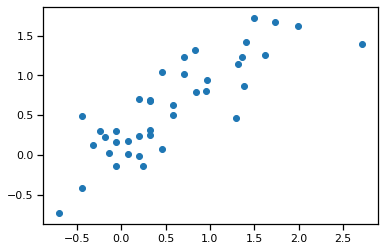

In [125]:
# Since this is regression, plot the predicted y value vs actual y values for the test data


plt.scatter(y_test, y_pred30)

We could see some linearity with some outliers in the above plot

In [126]:
X1 = df31[features]
y1 = df31[target]

In [127]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2, random_state=1)

In [128]:
lin_model31 = LinearRegression()
lin_model31.fit(X_train1, y_train1)
y_pred31 = lin_model31.predict(X_test1)
print('accuracy ',lin_model31.score(X_test1, y_test1))
print('coefficients for cluster 0 ',lin_model31.coef_)
print('R2 score is',r2_score(y_test1,y_pred31))


accuracy  0.8256382341122785
coefficients for cluster 0  [-0.15764866 -0.05064747 -0.06784877 -0.30377787 -0.1266908   0.19295394]
R2 score is 0.8256382341122785


In [129]:
#Mean square error
mse = np.mean((lin_model31.predict(X_test1)-y_test1)**2)

In [130]:
math.sqrt(mse)

0.30595334669475377

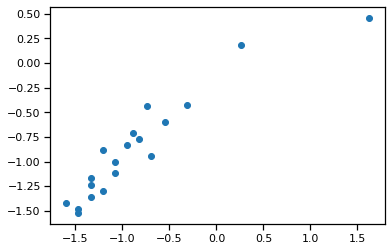

In [131]:
plt.scatter(y_test1, y_pred31)

In [132]:
X2 = df32[features]
y2 = df32[target]

In [133]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size=0.2, random_state=1)

In [134]:
lin_model32 = LinearRegression()
lin_model32.fit(X_train2, y_train2)
y_pred32 = lin_model32.predict(X_test2)
print('accuracy ',lin_model32.score(X_test2, y_test2))
print('coefficients for cluster 0 ',lin_model32.coef_)
print('R2 score is',r2_score(y_test2,y_pred32))

accuracy  0.8533685249728092
coefficients for cluster 0  [ 0.06581044 -0.23599321 -0.07507583 -0.50603231 -0.01620809  0.3831982 ]
R2 score is 0.8533685249728092


In [135]:
#mean square error for third cluster
mse = np.mean((lin_model32.predict(X_test2)-y_test2)**2)

In [136]:
math.sqrt(mse)

0.3784870272042283

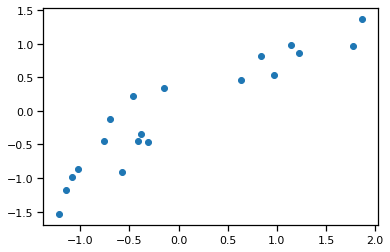

In [137]:
plt.scatter(y_test2, y_pred32)

R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
 we are using statsmodel to predict the adjusted R2 as this feature is not available in scikit learn
This library expects the X and Y to be given in one single dataframe


In [138]:

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

cyl      disp        hp        wt       acc        yr       mpg
381 -0.864014 -0.836395 -0.766593 -0.910724 -0.377930  1.636410  1.610521
29  -0.864014 -0.932079 -0.428421 -0.999134 -0.377930 -1.353505  0.455941
77  -0.864014 -0.702437 -0.740580 -0.550011  0.892329 -1.081695 -0.185492
328 -0.864014 -0.463226 -0.974698  0.321124  2.271468  1.092789  0.840801
149 -0.864014 -0.712005 -0.194303 -0.575944 -0.196464 -0.538074  0.071081

In [139]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr', data = data_train).fit()
lm1.params

Intercept   -0.084721
cyl          0.135611
disp        -0.109992
hp           0.029997
wt          -0.886159
acc          0.151781
yr           0.394328
dtype: float64

In [140]:

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     62.75
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.14e-38
Time:                        08:54:13   Log-Likelihood:                -112.30
No. Observations:                 159   AIC:                             238.6
Df Residuals:                     152   BIC:                             260.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0847      0.049     -1.714      0.0

In [141]:
data_train1 = pd.concat([X_train1, y_train1], axis=1)
data_train1.head()

cyl      disp        hp        wt       acc        yr       mpg
84  -0.864014 -0.932079 -0.428421 -1.034499  0.347933 -1.081695  0.455941
105  1.483947  1.584416  1.704660  1.976163 -0.922327 -0.809884 -1.340071
210  0.309967 -0.367542  0.091842 -0.056092 -0.014999  0.005547 -0.570352
38   1.483947  1.488732  1.574594  1.451596 -1.285258 -1.353505 -1.211785
284  0.309967  0.292679  0.143869  0.450793  0.384226  0.820978 -0.365093

In [142]:
lm2 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr', data = data_train1).fit()
lm2.params

Intercept   -0.296271
cyl         -0.157649
disp        -0.050647
hp          -0.067849
wt          -0.303778
acc         -0.126691
yr           0.192954
dtype: float64

In [143]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     64.83
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           2.06e-26
Time:                        08:54:14   Log-Likelihood:                 16.028
No. Observations:                  76   AIC:                            -18.06
Df Residuals:                      69   BIC:                            -1.740
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2963      0.043     -6.878      0.0

In [144]:
data_train2 = pd.concat([X_train2, y_train2], axis=1)
data_train2.head()

cyl      disp        hp        wt       acc        yr       mpg
361  0.309967 -0.252721  0.299948 -0.091456 -1.067499  1.364599  0.250683
207 -0.864014 -0.616321 -0.064237  0.203244  0.057588  0.005547 -0.442065
119 -0.864014 -0.769416 -0.350382 -0.466316 -0.559396 -0.809884 -0.442065
358 -0.864014 -0.712005 -0.792606 -0.403839  1.001209  1.364599  1.046059
167 -0.864014 -0.932079 -0.766593 -0.950804  0.166467 -0.266263  0.712514

In [145]:
lm3 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr', data = data_train2).fit()
lm3.params

Intercept   -0.110254
cyl          0.065810
disp        -0.235993
hp          -0.075076
wt          -0.506032
acc         -0.016208
yr           0.383198
dtype: float64

In [146]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     45.82
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.15e-21
Time:                        08:54:15   Log-Likelihood:                -27.740
No. Observations:                  73   AIC:                             69.48
Df Residuals:                      66   BIC:                             85.51
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1103      0.048     -2.298      0.025      -0.206      -0.014
cyl            0.0658      0.184      0.357      0.722      -0.302       0.434
disp          -0.2360      0.243     -0.973      0.334      -0.720       0.248
hp            -0.0751      0.166     -0.452      0.652      -0.406       0.256
wt            -0.5060      0.163     -3.113      0.003      -0.831      -0.181
acc           -0.0162      0.088     -0.184      0.855      -0.192       0.160
yr             0.3832      0.057      6.753      0.000       0.270       0.496
==============================================================================
Omnibus:                        8.524   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.198
Skew:                           0.579   Prob(JB):                       0.0101
Kurtosis:                       4.297   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above Ordinary Least square we can find R2,Adjusted r2 for linear regression method .

The R2 value is less. Let's see removing outlier can help in getting higher r2 value. 
Removing outliers found in hp and acc column in the below  steps

In [172]:
#Q1 = cardf['hp'].quantile(0.25)
#Q3 = cardf['hp'].quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#cardf['hp'].loc[(cardf['hp'] > = (Q1 - 1.5 * IQR)) & (cardf['hp'] < = (Q3 - 1.5 * IQR).all(axis=1)]
#cardf['hp'].loc[cardf.hp[Q1 - 1.5 * IQR]]
#(((cardf >= (Q1 - 1.5 * IQR)) | (cardf >= (Q3 + 1.5 * IQR))).any(axis=1))
#newcardf = cardf.loc[cardf >= (Q1 - 1.5 * IQR) & (cardf >= (Q3 + 1.5 * IQR)).all(axis=1)]

In [173]:
#cardf_new = []
#def remove_outlier(df_in, col_name):
q1 = cardf['hp'].quantile(0.25)
q3 = cardf['hp'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
cardfout = cardf.loc[(cardf['hp'] > fence_low) & (cardf['hp'] < fence_high)]
#cardf_new.append(df_out)
#    return df_out
#remove_outlier(cardf,'hp')

In [174]:
q1 = cardf['acc'].quantile(0.25)
q3 = cardf['acc'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
cardfout1 = cardf.loc[(cardf['acc'] > fence_low) & (cardf['acc'] < fence_high)]
#cardf_new.append(df_out)
#    return df_out
#remove_outlier(cardf,'hp')

In [175]:
#sample data after removing the outlier
cardfout1.head(5)

cyl   disp     hp    wt   acc  yr   mpg
0    8  307.0  130.0  3504  12.0  70  18.0
1    8  350.0  165.0  3693  11.5  70  15.0
2    8  318.0  150.0  3436  11.0  70  18.0
3    8  304.0  150.0  3433  12.0  70  16.0
4    8  302.0  140.0  3449  10.5  70  17.0

In [176]:
#shape of the dataframe before and after removing outliers
cardf.shape, cardfout1.shape

((392, 7), (381, 7))

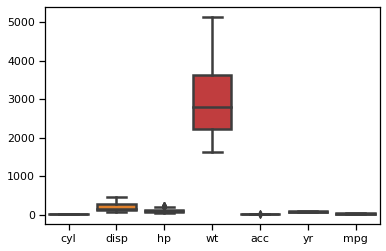

In [177]:
#boxplt to find outliers after treating it
sns.boxplot(data = cardfout1)

Repeating the above procedures

In [178]:
cardfo_z = cardfout1.apply(zscore)

In [182]:
cluster_range1 = range (2,15)
cluster_sillhouttescore1 = []
cluster_error1 = []
for num_clus in cluster_range:
    clusterso = KMeans(n_clusters = num_clus , n_init = 10)
    clusterso.fit(cardf_z)
    labels = clusterso.labels_
    centroido = clusterso.cluster_centers_
    cluster_error1.append(clusters.inertia_)
    #using euclidean distance as distance calculation formula while finding out the silhoute score
    cluster_sillhouttescore1.append(metrics.silhouette_score(cardf_z, labels, metric='euclidean'))

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df1 = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error ,"Avg Sil Score": cluster_sillhouttescore  } )
clusters_df1


num_clusters  cluster_errors  Avg Sil Score
0              2     1272.900760       0.481209
1              3      928.617487       0.354494
2              4      725.309400       0.348885
3              5      654.902067       0.314002
4              6      584.785271       0.274925
5              7      535.998074       0.282381
6              8      489.658108       0.268474
7              9      446.674538       0.269466
8             10      418.331577       0.259558
9             11      397.362737       0.264741
10            12      377.099873       0.257749
11            13      352.696285       0.254876
12            14      332.233575       0.271969

cluster errors are same after treating outliers

In [183]:
##considering n_init as 10 first . Number of tims K-means will iterate with different centroid seeds
cluster00 = KMeans(n_clusters=3, n_init = 15, random_state=2)
cluster00.fit(cardfo_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [184]:
#printng centroids of the three cluster
centroidso = cluster00.cluster_centers_
centroidso
##centroid of 7 different attributes cyl,disp ,hp,wt,acc,yr,mpg

array([[ 1.48959525,  1.48519502,  1.50084038,  1.3920254 , -1.08617359,
        -0.64249804, -1.15633685],
       [-0.85281254, -0.80884985, -0.67359095, -0.79403125,  0.3325029 ,
         0.31601021,  0.77581634],
       [ 0.33653594,  0.24679867, -0.05847715,  0.30823718,  0.37418369,
        -0.03417601, -0.50492205]])

In [185]:

# Let us put the raw centroid values into a dataframe under respective columns
centroid00_df = pd.DataFrame(centroidso, columns = list(cardfo_z) )
centroid00_df


cyl      disp        hp        wt       acc        yr       mpg
0  1.489595  1.485195  1.500840  1.392025 -1.086174 -0.642498 -1.156337
1 -0.852813 -0.808850 -0.673591 -0.794031  0.332503  0.316010  0.775816
2  0.336536  0.246799 -0.058477  0.308237  0.374184 -0.034176 -0.504922

In [186]:
dfoo_labels = pd.DataFrame(cluster00.labels_ , columns = list(['class']))

dfoo_labels['class'] = dfoo_labels['class'].astype('category')


In [187]:

# Joining the label dataframe with the car data frame to create cardf_labeled. Note: it could be appended to original dataframe
cardf00_labeled = cardfo_z.join(dfoo_labels)


In [188]:
#finding the count of the diffrent class
cardf00_labeled['class'].value_counts()

1    185
2     91
0     89
Name: class, dtype: int64

In [189]:
cardf00_labeled.groupby("class").count()


cyl  disp   hp   wt  acc   yr  mpg
class                                    
0       89    89   89   89   89   89   89
1      185   185  185  185  185  185  185
2       91    91   91   91   91   91   91

Text(0.5, 0.92, '3D plot of KMeans Clustering')

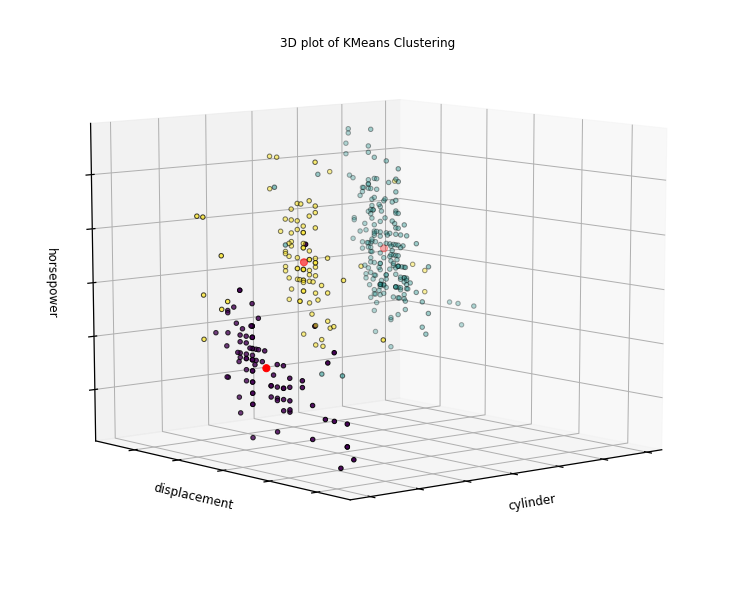

In [190]:
#3D Scatter Plot for the data after removing outliers
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)

L = cluster00.labels_
ax.scatter(cardf00_labeled.iloc[:, 0], cardf00_labeled.iloc[:, 2], cardf00_labeled.iloc[:, 4],
           c=L.astype(np.float), edgecolor='k')
ax.scatter(centroidso[:, 0], centroidso[:, 2],centroidso[:, 4], c='red', s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('cylinder')
ax.set_ylabel('displacement')
ax.set_zlabel('horsepower')
ax.set_title('3D plot of KMeans Clustering')

From this we could see that the outliers are reduced. The outliers prduced are due to clustering. Now form the dataframe with three separate clusters and find coefficient of determination for the outliertreated data

In [191]:
#forming separatedataframe from the results obtained from 3 different clusters
car_clusterso3 = cardf00_labeled.groupby(['class'])
dfo30=car_clusterso3.get_group(0)
dfo31=car_clusterso3.get_group(1)
dfo32=car_clusterso3.get_group(2)
#dfo represents outliers treated data

In [194]:
featureso = ['cyl', 'disp', 'hp', 'wt', 'acc','yr']
targeto = 'mpg'
Xo0 = dfo30[featureso]
yo0 = dfo30[targeto]

X_traino, X_testo, y_traino, y_testo = train_test_split(Xo0,yo0,test_size=0.2, random_state=10)

lin_modelo30 = LinearRegression()
lin_modelo30.fit(X_traino, y_traino)
y_predo30 = lin_modelo30.predict(X_testo)
print('accuracy ',lin_modelo30.score(X_testo, y_testo))
print('coefficients for cluster 0 ',lin_modelo30.coef_)
print('R2 score is',r2_score(y_testo,y_predo30))

accuracy  0.8631532669105212
coefficients for cluster 0  [-0.06928263  0.24736235  0.04551477 -0.87771888  0.01692706  0.17759137]
R2 score is 0.8631532669105212


In [214]:
Xo1 = dfo31[featureso]
yo1 = dfo31[targeto]

X_traino1, X_testo1, y_traino1, y_testo1 = train_test_split(Xo1,yo1,test_size=0.2, random_state=12)

lin_modelo31 = LinearRegression()
lin_modelo31.fit(X_traino1, y_traino1)
y_predo31 = lin_modelo30.predict(X_testo1)
print('accuracy ',lin_modelo30.score(X_testo1, y_testo1))
print('coefficients for cluster 0 ',lin_modelo31.coef_)
print('R2 score is',r2_score(y_testo1,y_predo31))

accuracy  0.7402764100299231
coefficients for cluster 0  [-0.01228651 -0.12340565 -0.11986365 -0.63604414 -0.00432446  0.34116471]
R2 score is 0.7402764100299231


In [215]:
Xo2 = dfo32[featureso]
yo2 = dfo32[targeto]

X_traino2, X_testo2, y_traino2, y_testo2 = train_test_split(Xo2,yo2,test_size=0.2, random_state=12)

lin_modelo32 = LinearRegression()
lin_modelo32.fit(X_train, y_train)
y_predo32 = lin_modelo32.predict(X_testo2)
print('accuracy ',lin_modelo32.score(X_testo2, y_testo2))
print('coefficients for cluster 0 ',lin_modelo32.coef_)
print('R2 score is',r2_score(y_testo2,y_predo32))

accuracy  0.8224413003675451
coefficients for cluster 0  [ 0.1356107  -0.10999232  0.02999695 -0.88615854  0.15178064  0.39432753]
R2 score is 0.8224413003675451


There is  improvement in the R2 value after treating outliers. 

Conclusion : From k-means and dendogram we could observe that there are 3 clusters in the dataset. The R2 found with the data obtained from three clusters are not high.
Treaing outliers helped in improving the r2 value slightly.For data which shows curvilinear relation it is advisable to use polynomial features for more accuracy in the original dataframe. As our aim is to predict the cluster and find R2 of the dataset obtained our clusters, we are concluding here on the analysis of dataset